[ggplot2 book](https://ggplot2-book.org/)

# Import

In [15]:
source('ggplot3.R')

In [16]:
library(mgcv)

# data

In [17]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


## 2.3 Key components


`ggplot2`

```r
ggplot(mpg, aes(x = displ, y = hwy)) + geom_point()
```

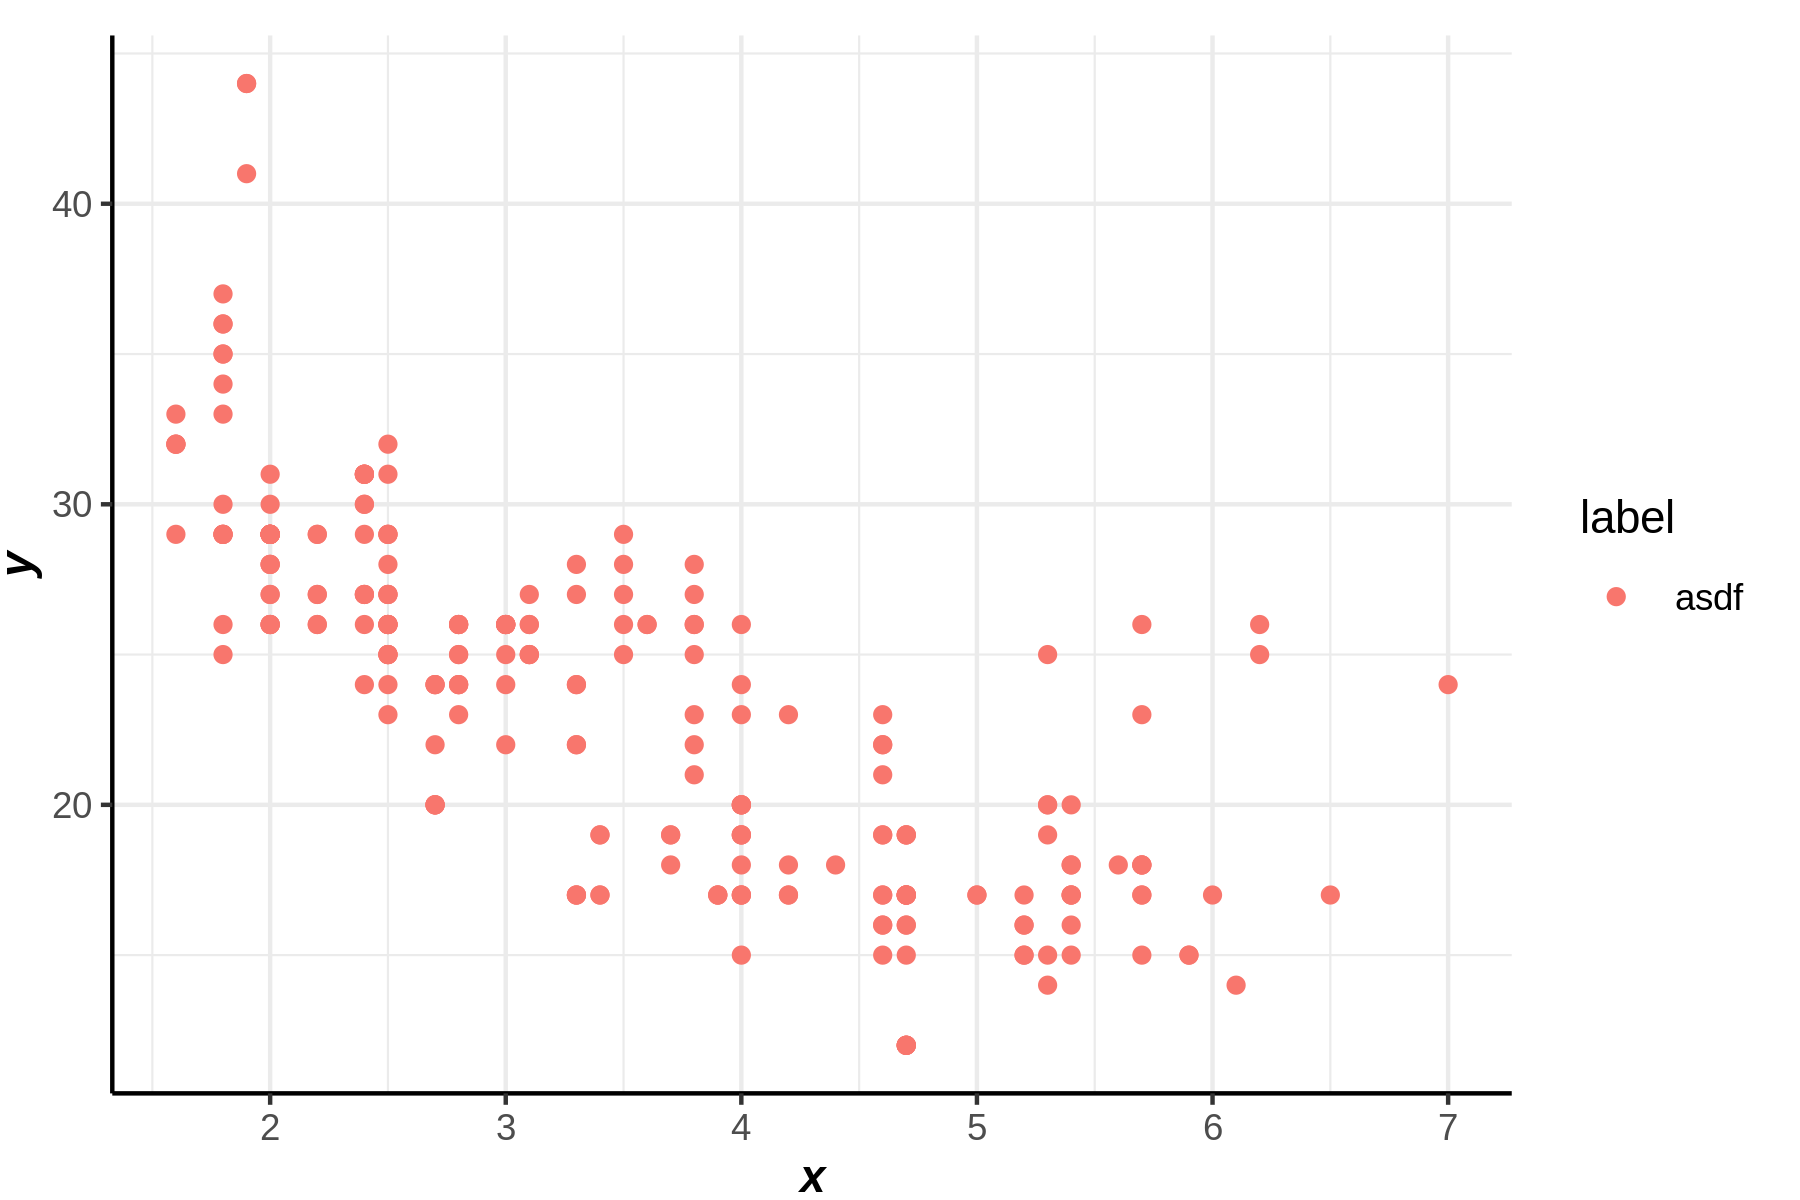

In [70]:
ggplot(mpg) + point(mpg$displ, mpg$hwy)

## 2.4 Colour, size, shape and other aesthetic attributes

`ggplot2`

```r
ggplot(mpg, aes(displ, hwy, colour = class)) + 
  geom_point()
```

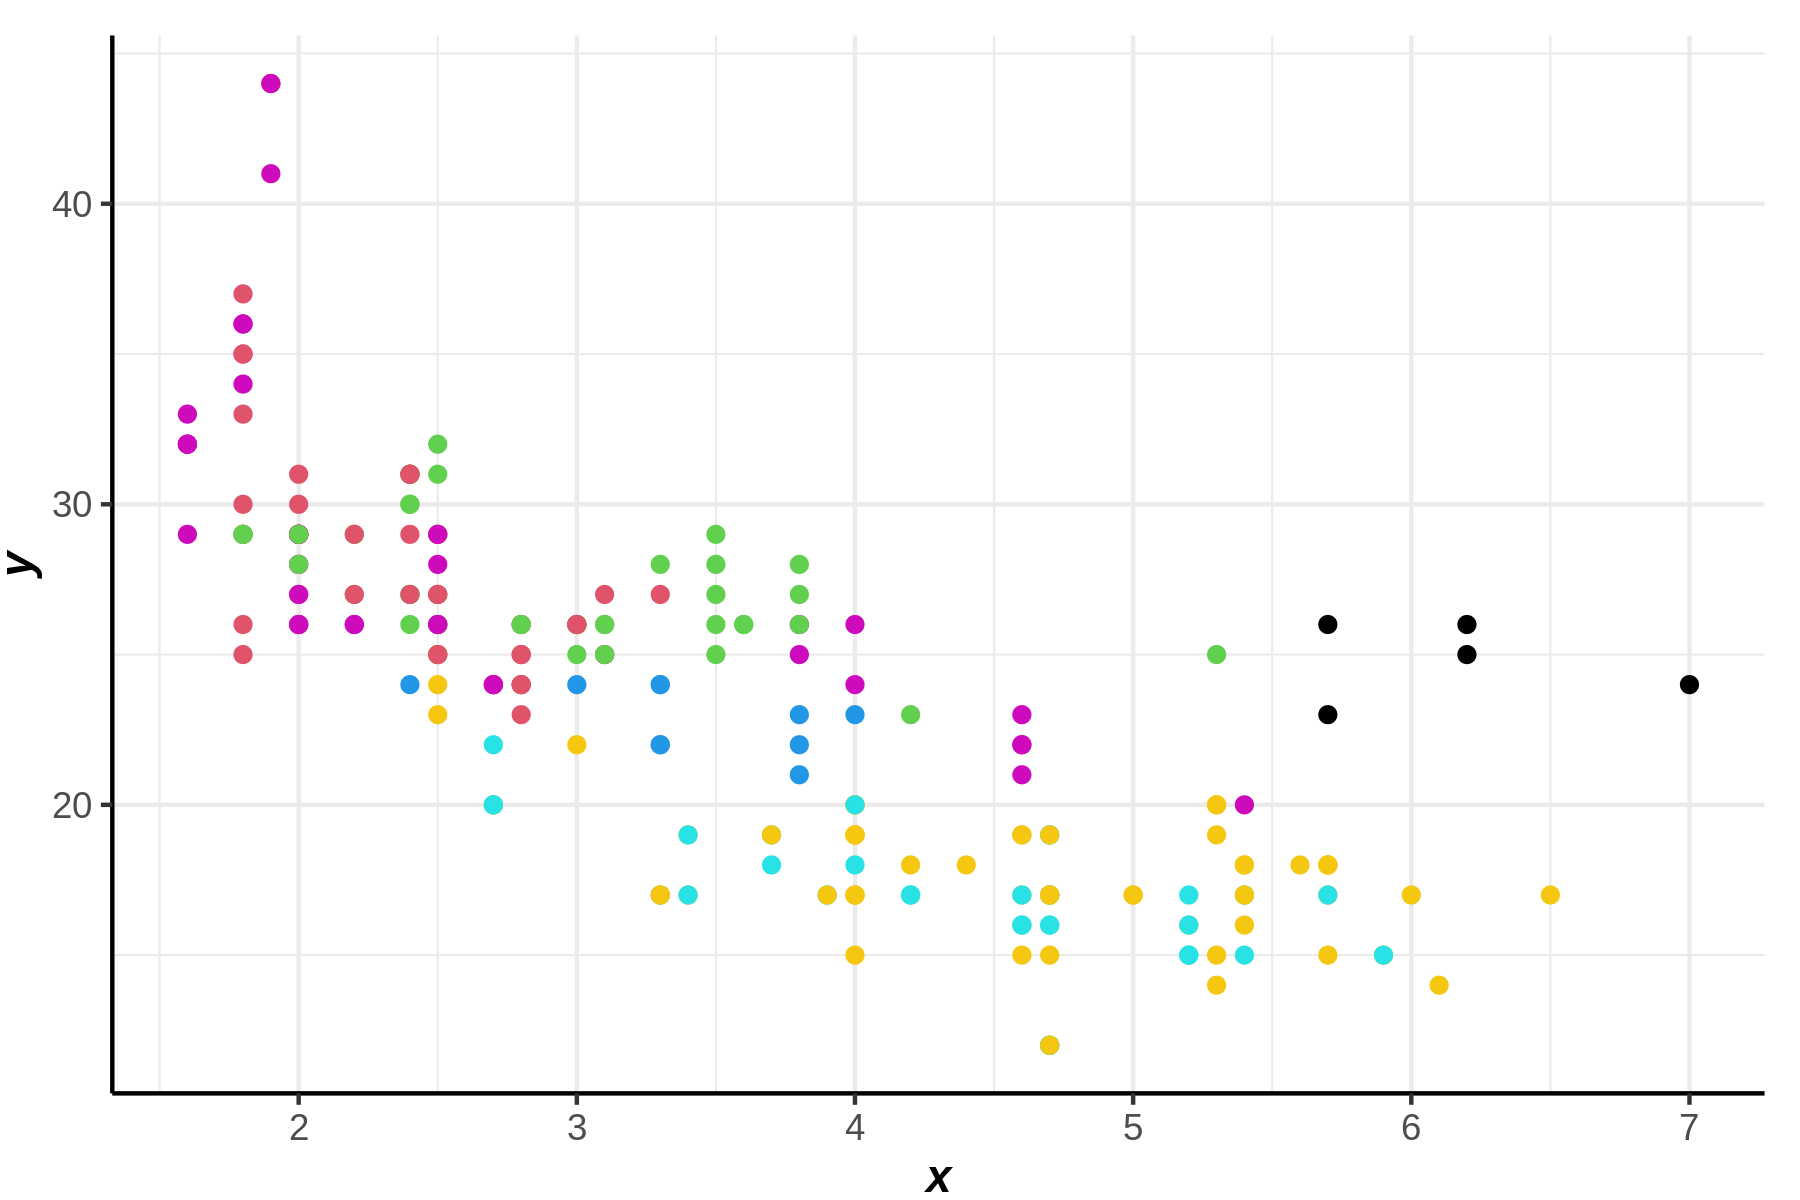

In [5]:
ggplot() + point(mpg$displ, mpg$hwy, col = as.numeric(factor(mpg$class)))

`ggplot2`
```R
ggplot(mpg, aes(displ, hwy)) + geom_point(aes(colour = "blue"))
ggplot(mpg, aes(displ, hwy)) + geom_point(colour = "blue")
```

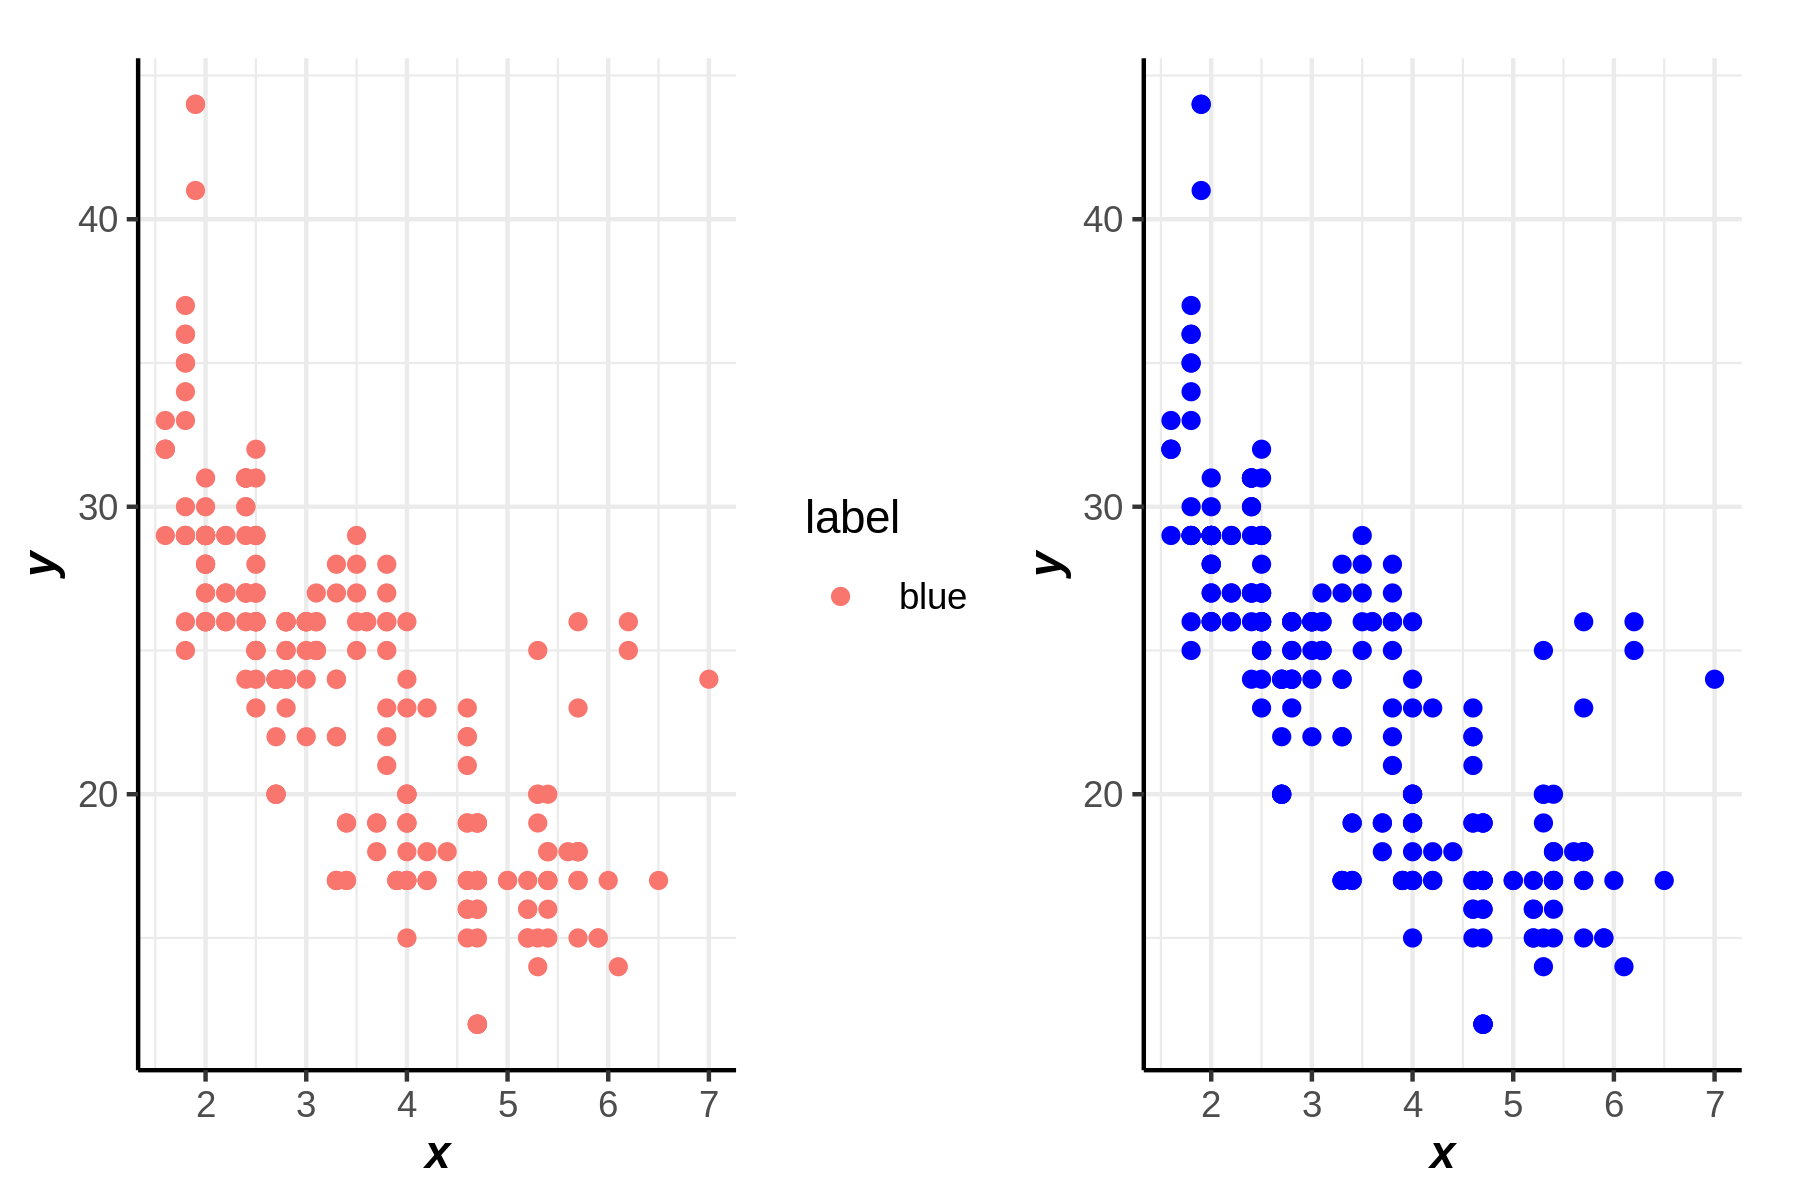

In [6]:
ggplot() + point(label='blue',mpg$displ, mpg$hwy)|ggplot() + point(mpg$displ, mpg$hwy, col ="blue")

### 2.5 Faceting

`ggplot2`
```R
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  facet_wrap(~class)
```

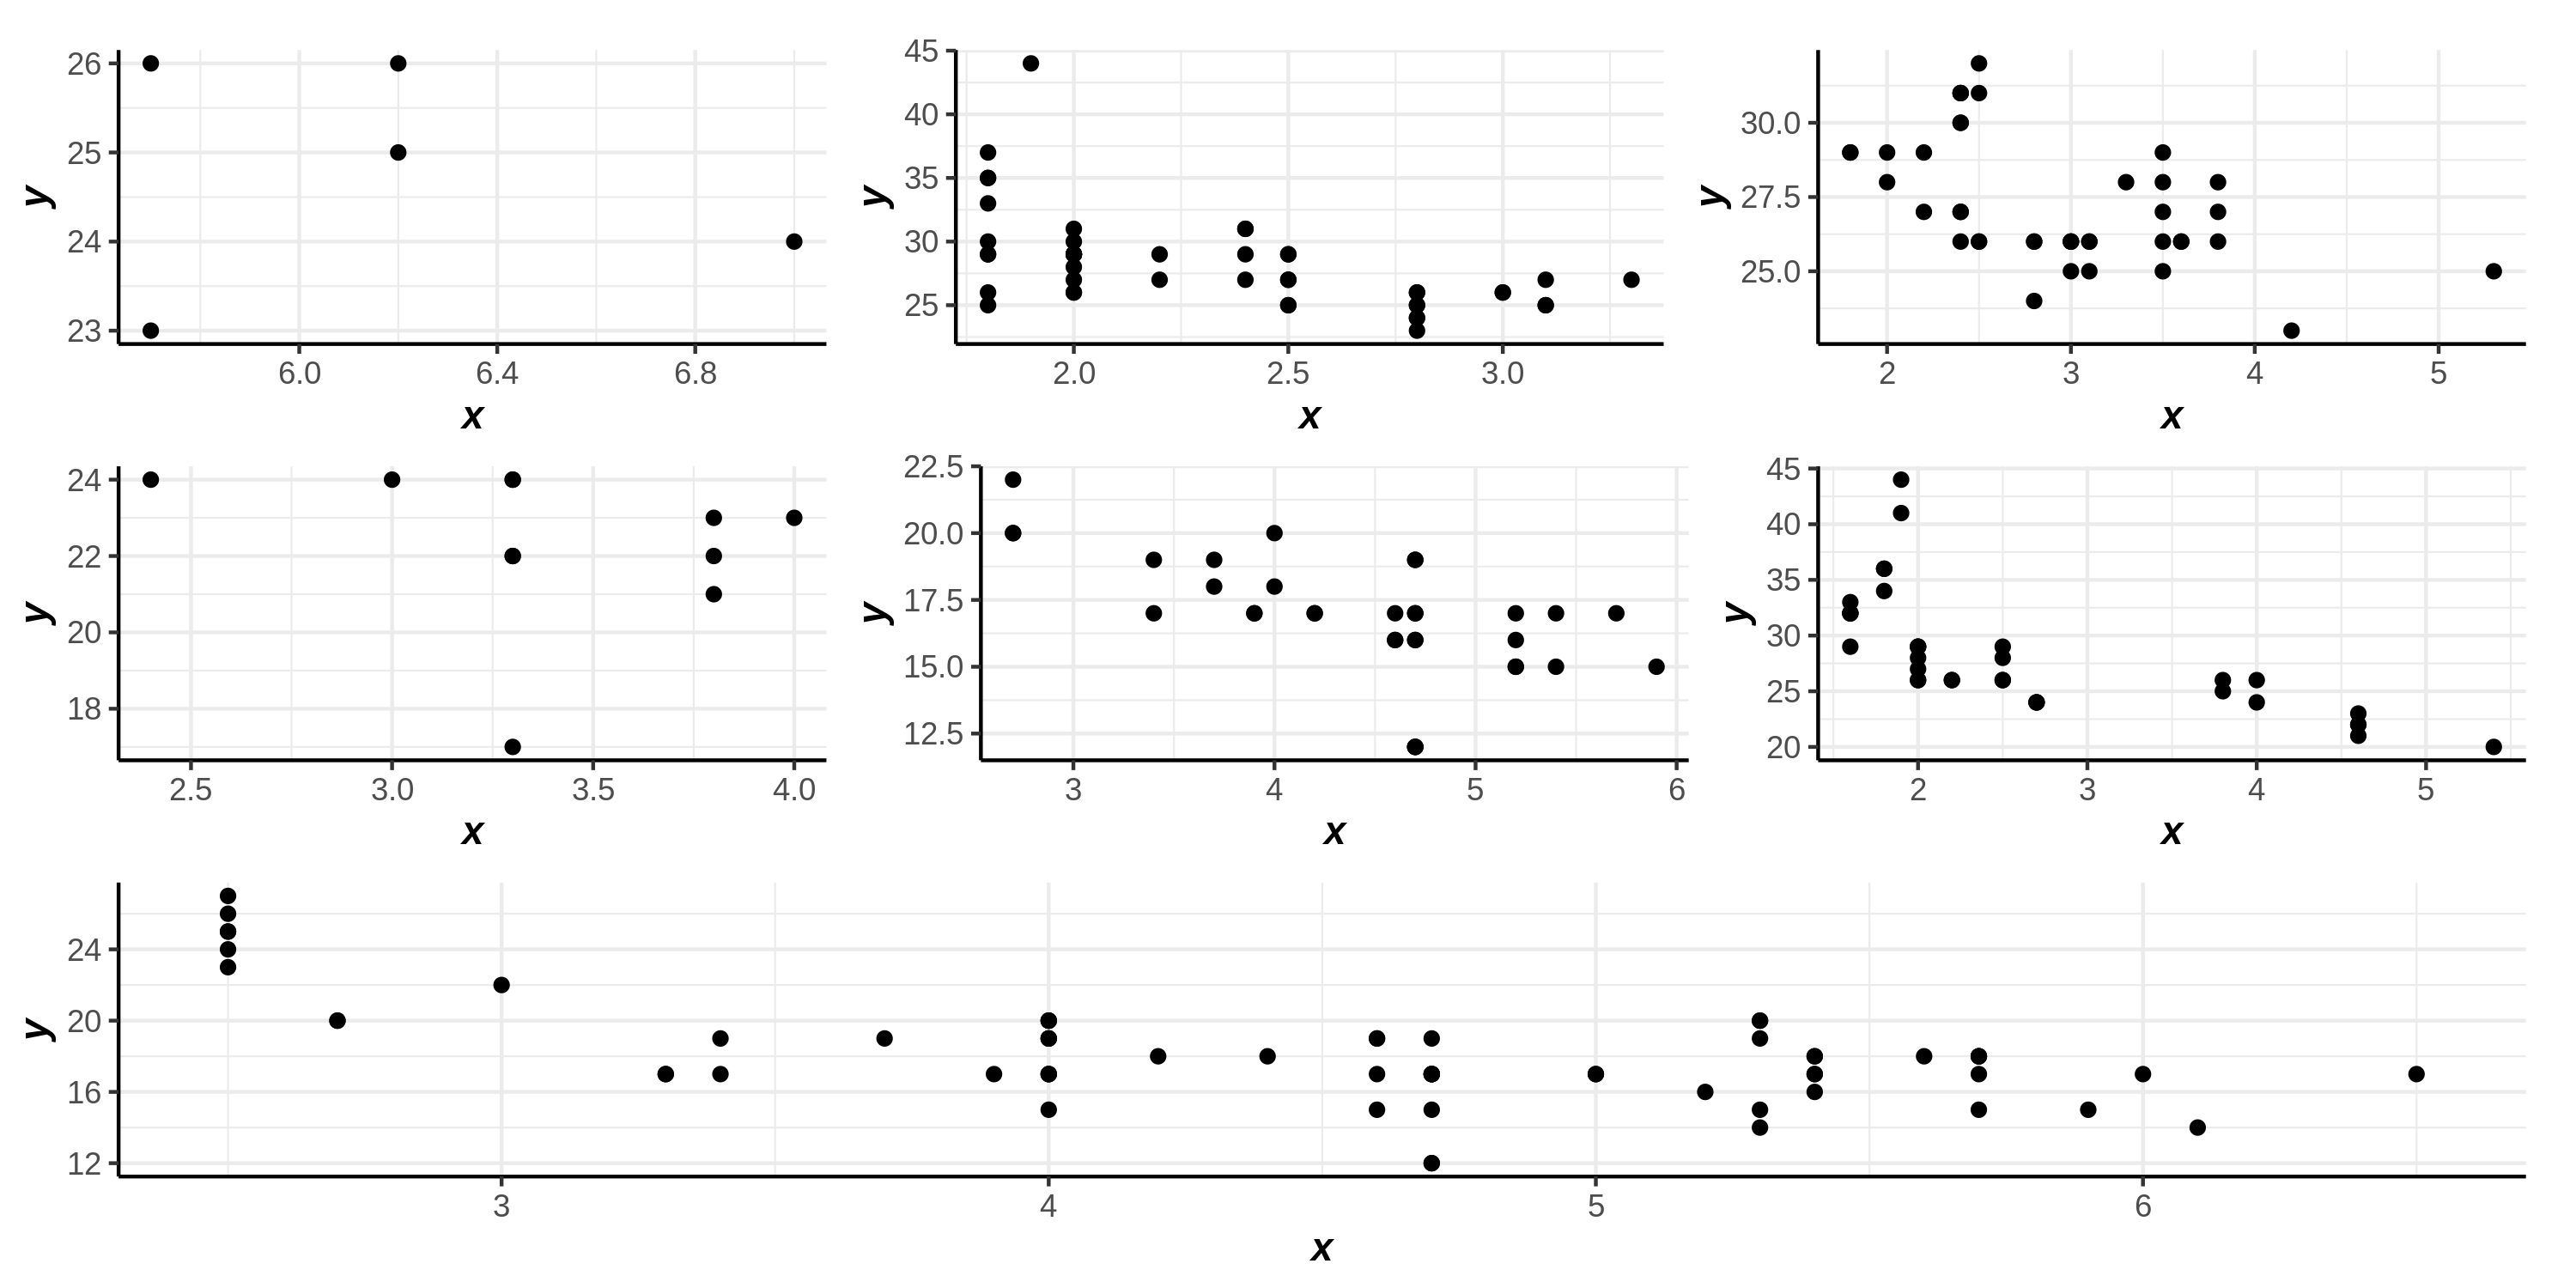

In [7]:
p1 = ggplot() + point(mpg$displ[mpg$class=='2seater'],mpg$hwy[mpg$class=='2seater'])
p2 = ggplot() + point(mpg$displ[mpg$class=='compact'],mpg$hwy[mpg$class=='compact'])
p3 = ggplot() + point(mpg$displ[mpg$class=='midsize'],mpg$hwy[mpg$class=='midsize'])
p4 = ggplot() + point(mpg$displ[mpg$class=='minivan'],mpg$hwy[mpg$class=='minivan'])
p5 = ggplot() + point(mpg$displ[mpg$class=='pickup'],mpg$hwy[mpg$class=='pickup'])
p6 = ggplot() + point(mpg$displ[mpg$class=='subcompact'],mpg$hwy[mpg$class=='subcompact'])
p7 = ggplot() + point(mpg$displ[mpg$class=='suv'],mpg$hwy[mpg$class=='suv'])
figsize(10,5)
(p1|p2|p3)/(p4|p5|p6)/(p7)
figsize()

## 2.6.1 Adding a smoother to a plot

`ggplot2`
```R
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  geom_smooth()
#> `geom_smooth()` using method = 'loess' and formula = 'y ~ x'
```

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


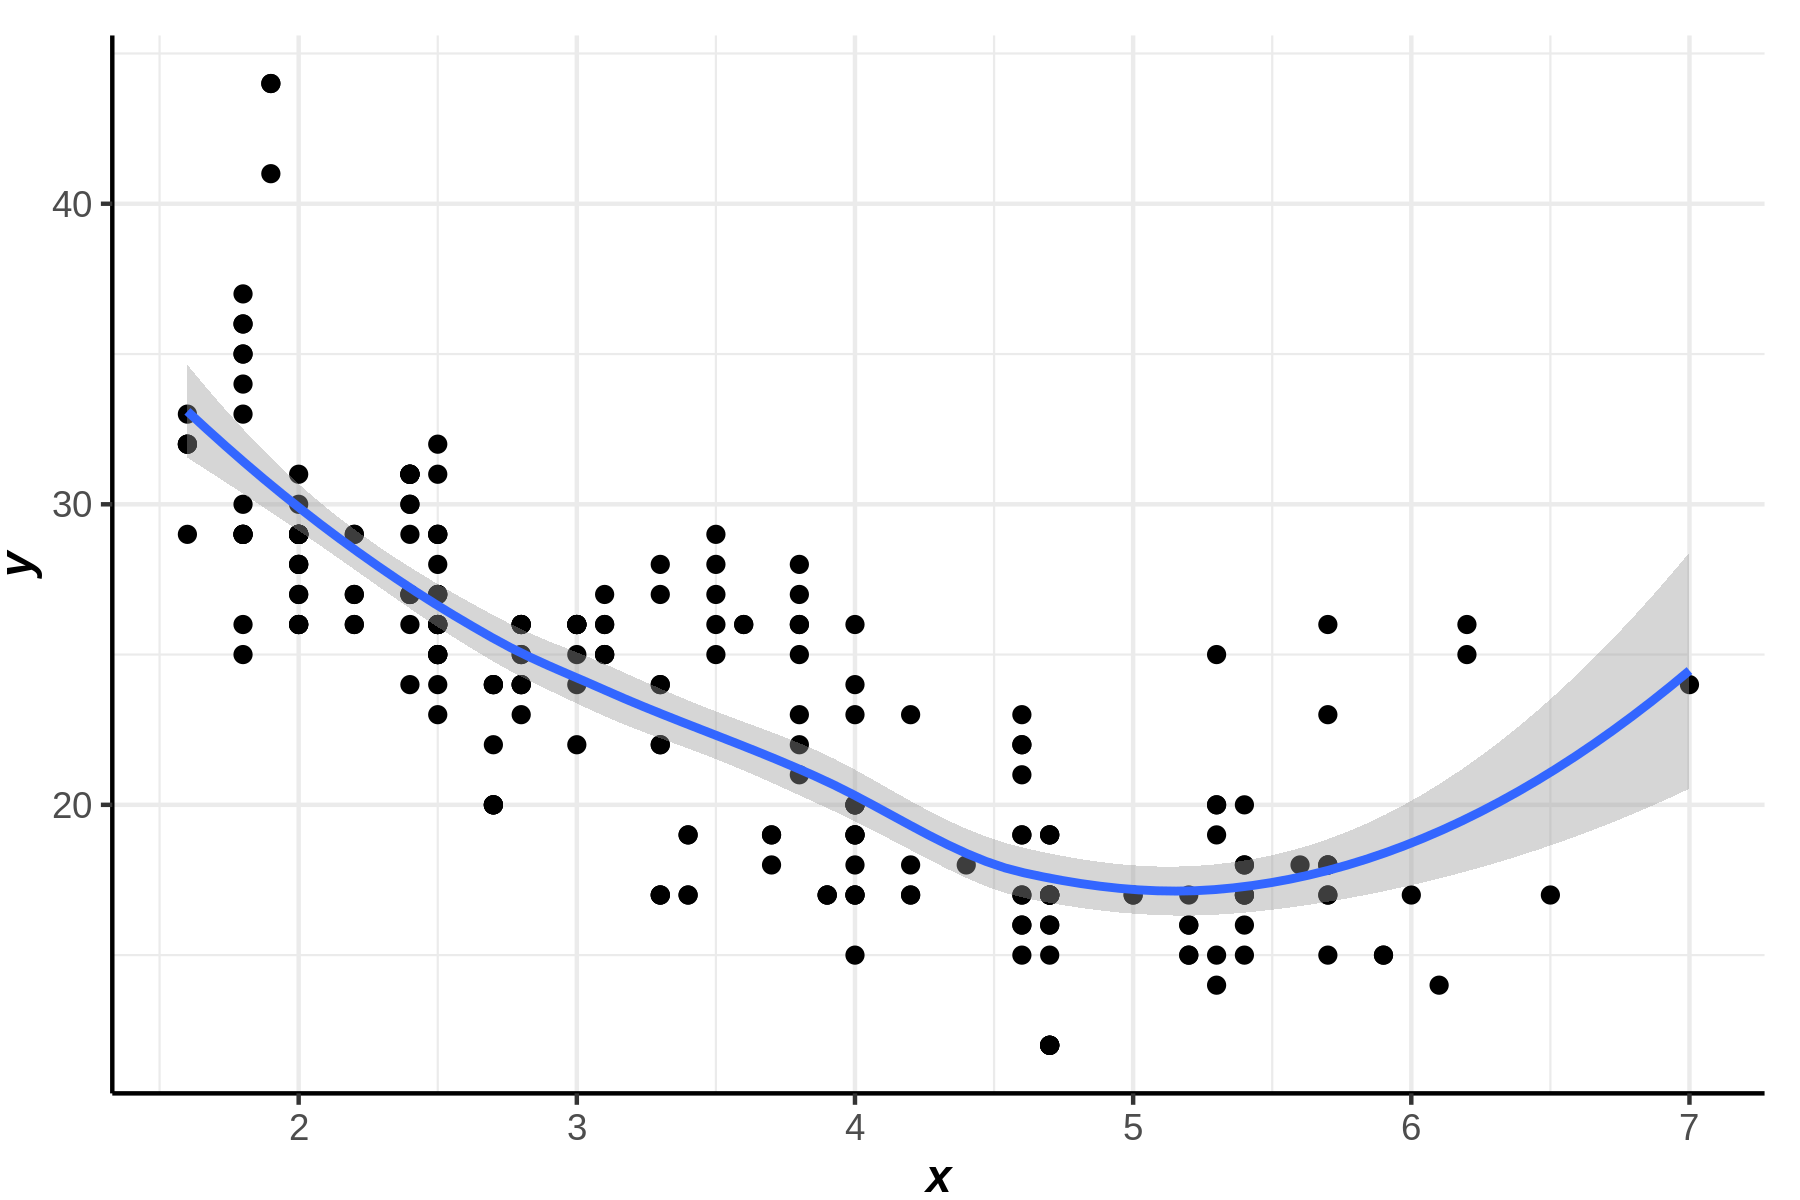

In [8]:
ggplot() + point(mpg$displ, mpg$hwy) + smooth(mpg$displ, mpg$hwy) 

### Add plot

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


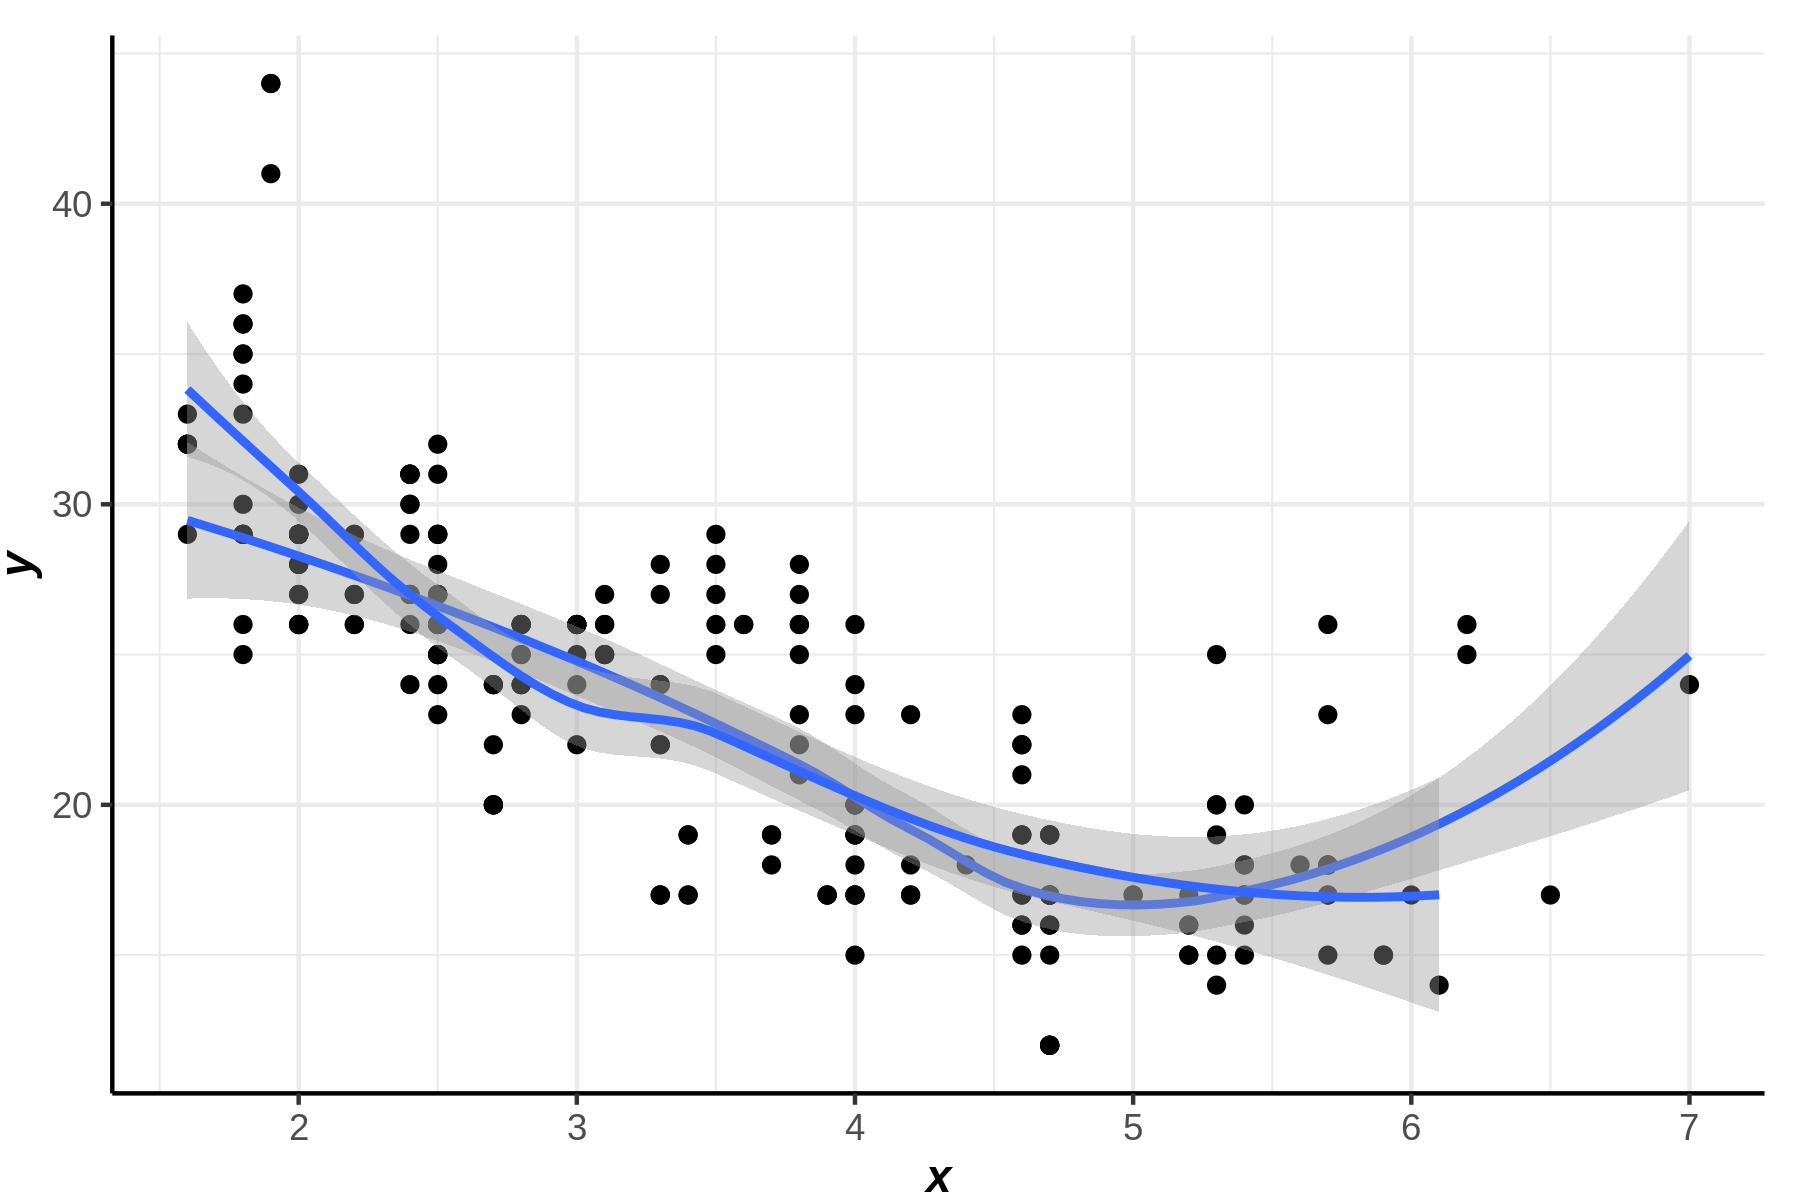

In [9]:
ggplot() + point(mpg$displ, mpg$hwy) + smooth(mpg$displ[1:100], mpg$hwy[1:100]) + smooth(mpg$displ[100:234], mpg$hwy[100:234]) 

In [10]:
x = 1:100/100
y1 = 2*x + rnorm(100)*0.3
y2 = -3*x + rnorm(100)*0.3 +3

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


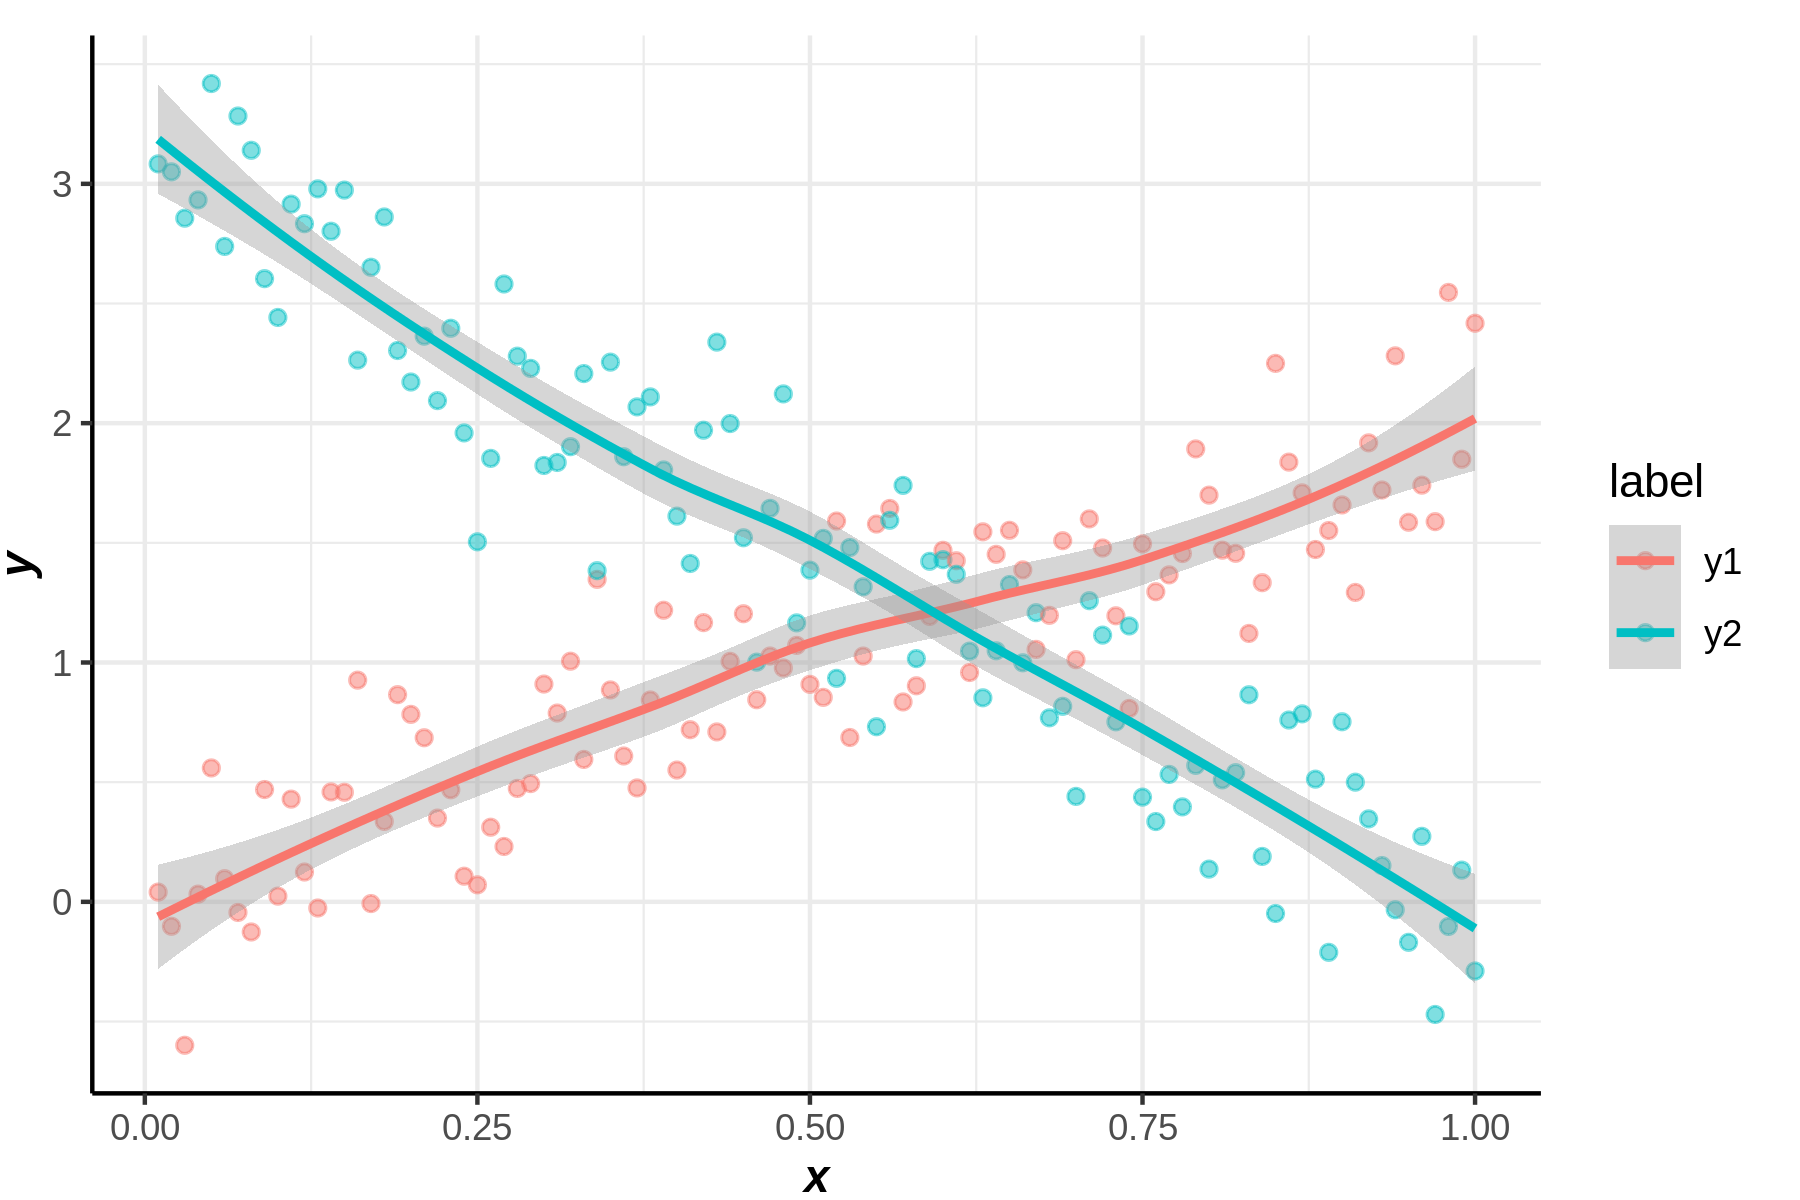

In [11]:
ggplot()+point(x,cbind(y1,y2),alpha=0.5) +
smooth(x,cbind(y1,y2))

`ggplot2`
```R
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  geom_smooth(span = 0.2)
#> `geom_smooth()` using method = 'loess' and formula = 'y ~ x'

ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  geom_smooth(span = 1)
#> `geom_smooth()` using method = 'loess' and formula = 'y ~ x'
```

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


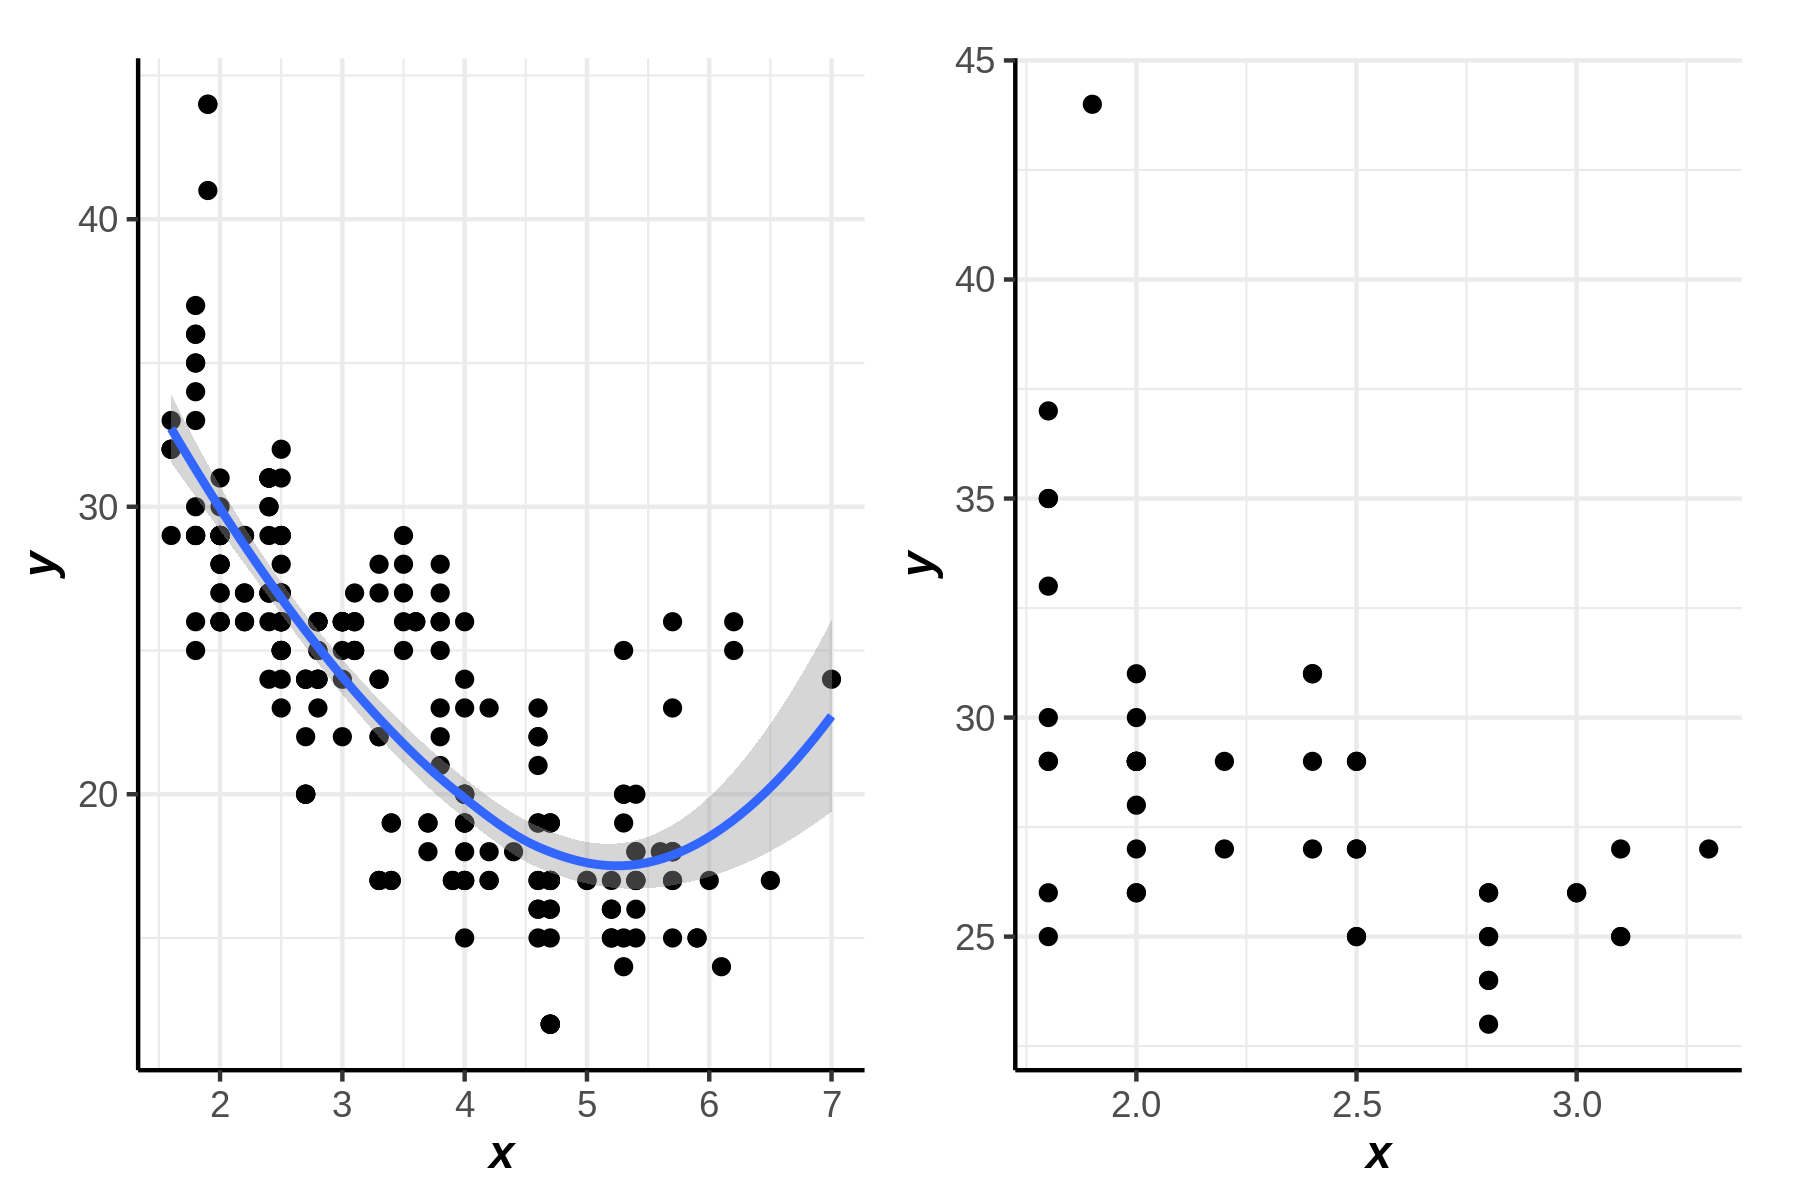

In [12]:
p1 = ggplot() + point(mpg$displ, mpg$hwy) + smooth(mpg$displ, mpg$hwy,span = 0.2)
p1 = ggplot() + point(mpg$displ, mpg$hwy)  + smooth(mpg$displ, mpg$hwy,span = 1)
p1|p2

`ggplot2`
```R
library(mgcv)
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  geom_smooth(method = "gam", formula = y ~ s(x))
```

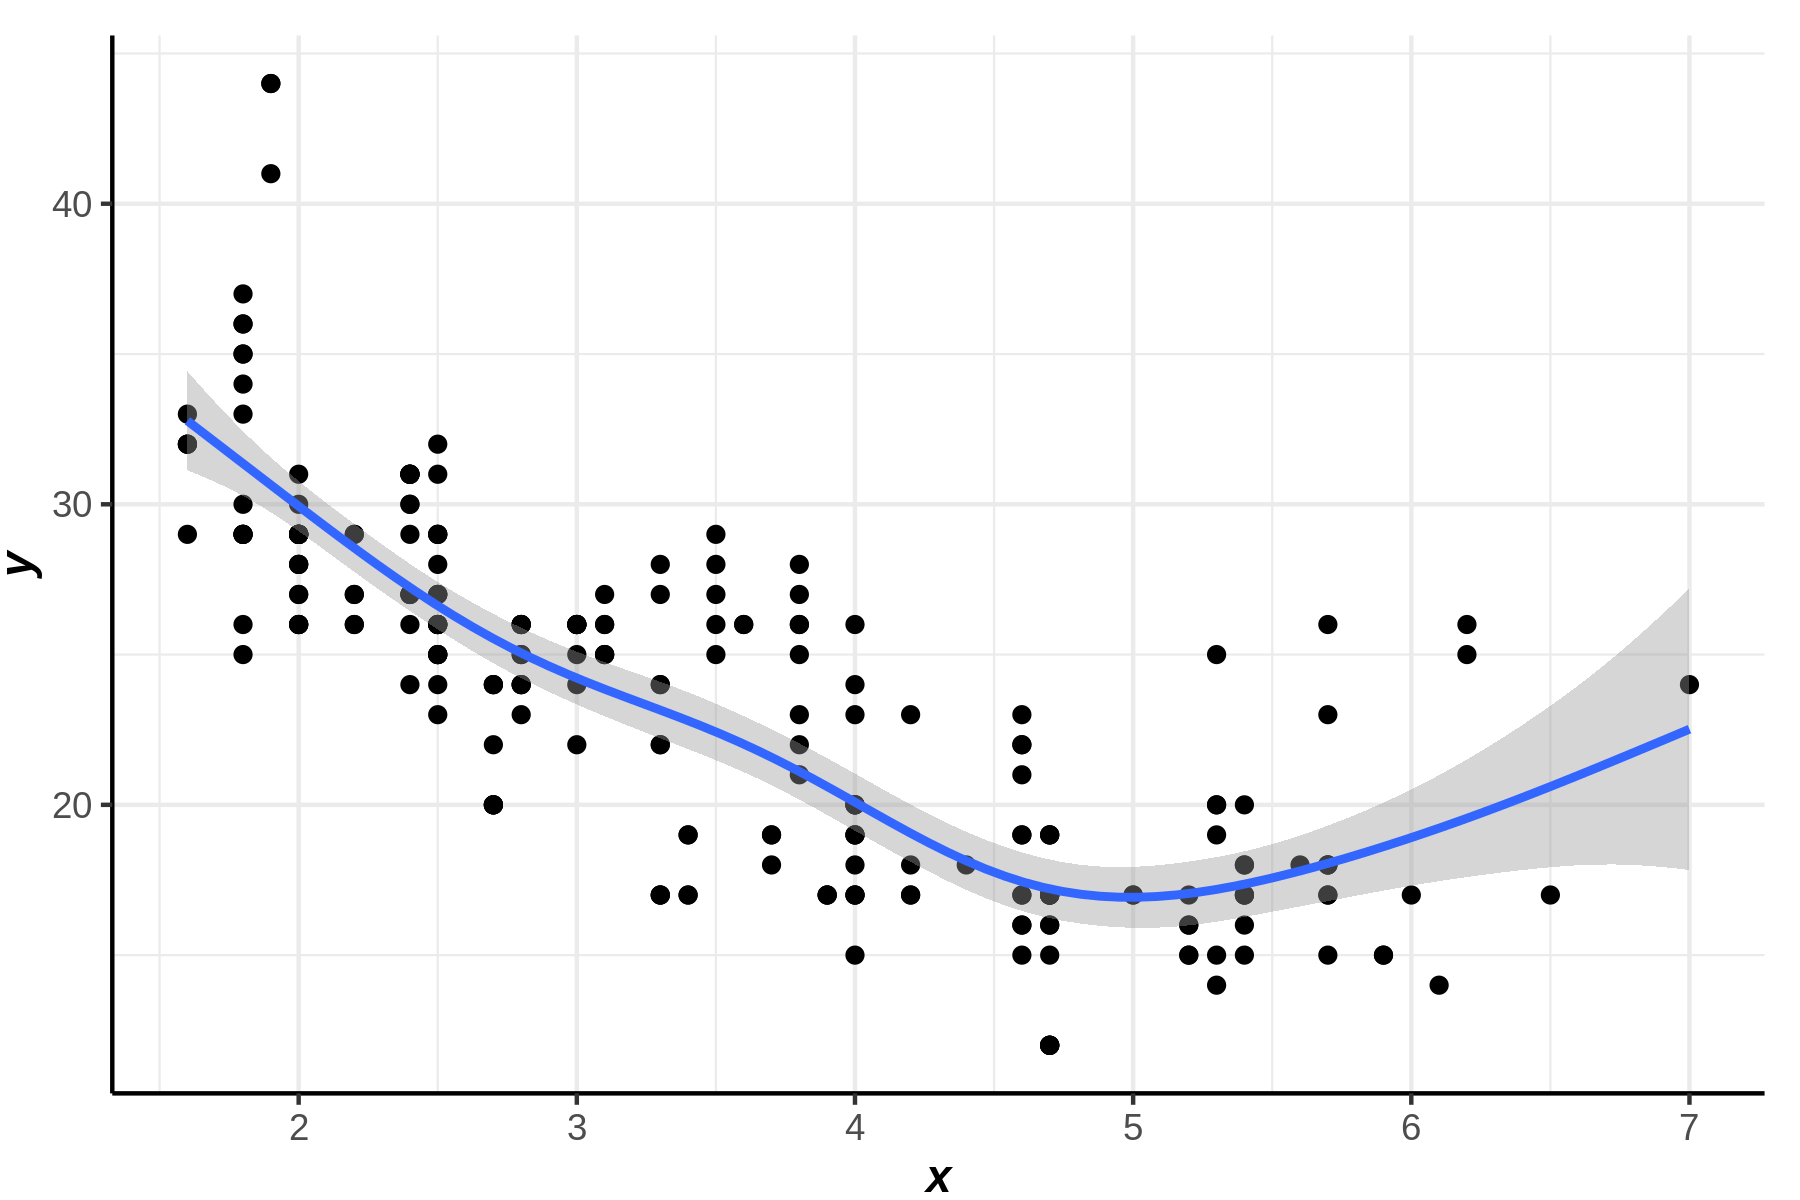

In [13]:
ggplot() + point(mpg$displ, mpg$hwy) + smooth(mpg$displ, mpg$hwy, method = "gam", formula = y ~ s(x))

`ggplot2`
```R
ggplot(mpg, aes(displ, hwy)) + 
  geom_point() + 
  geom_smooth(method = "lm")
#> `geom_smooth()` using formula = 'y ~ x'
```

`geom_smooth()` using formula = 'y ~ x'


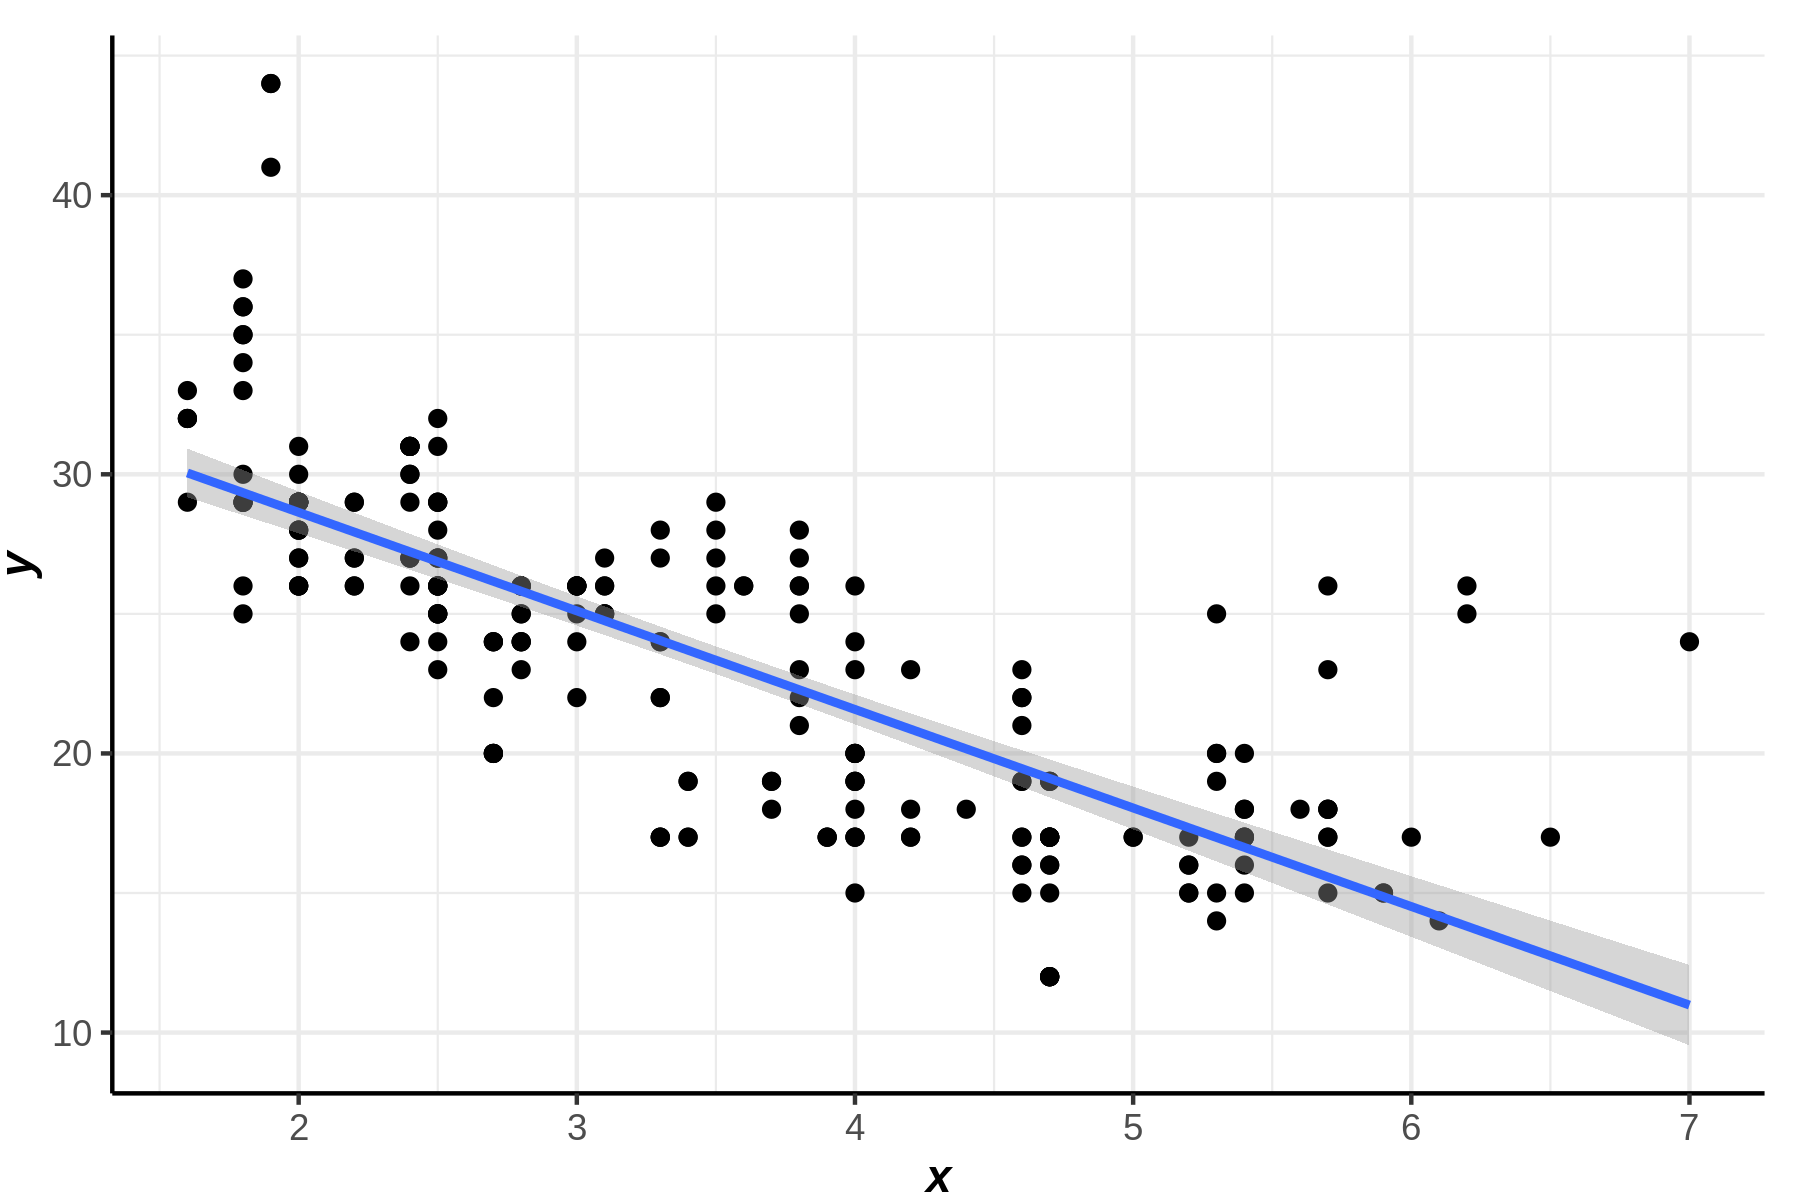

In [14]:
ggplot() + point(mpg$displ, mpg$hwy) + smooth(mpg$displ, mpg$hwy,method = "lm")

## 2.6.2 Boxplots and jittered points


`ggplot2`
```R
ggplot(mpg, aes(drv, hwy)) + 
  geom_point()
```

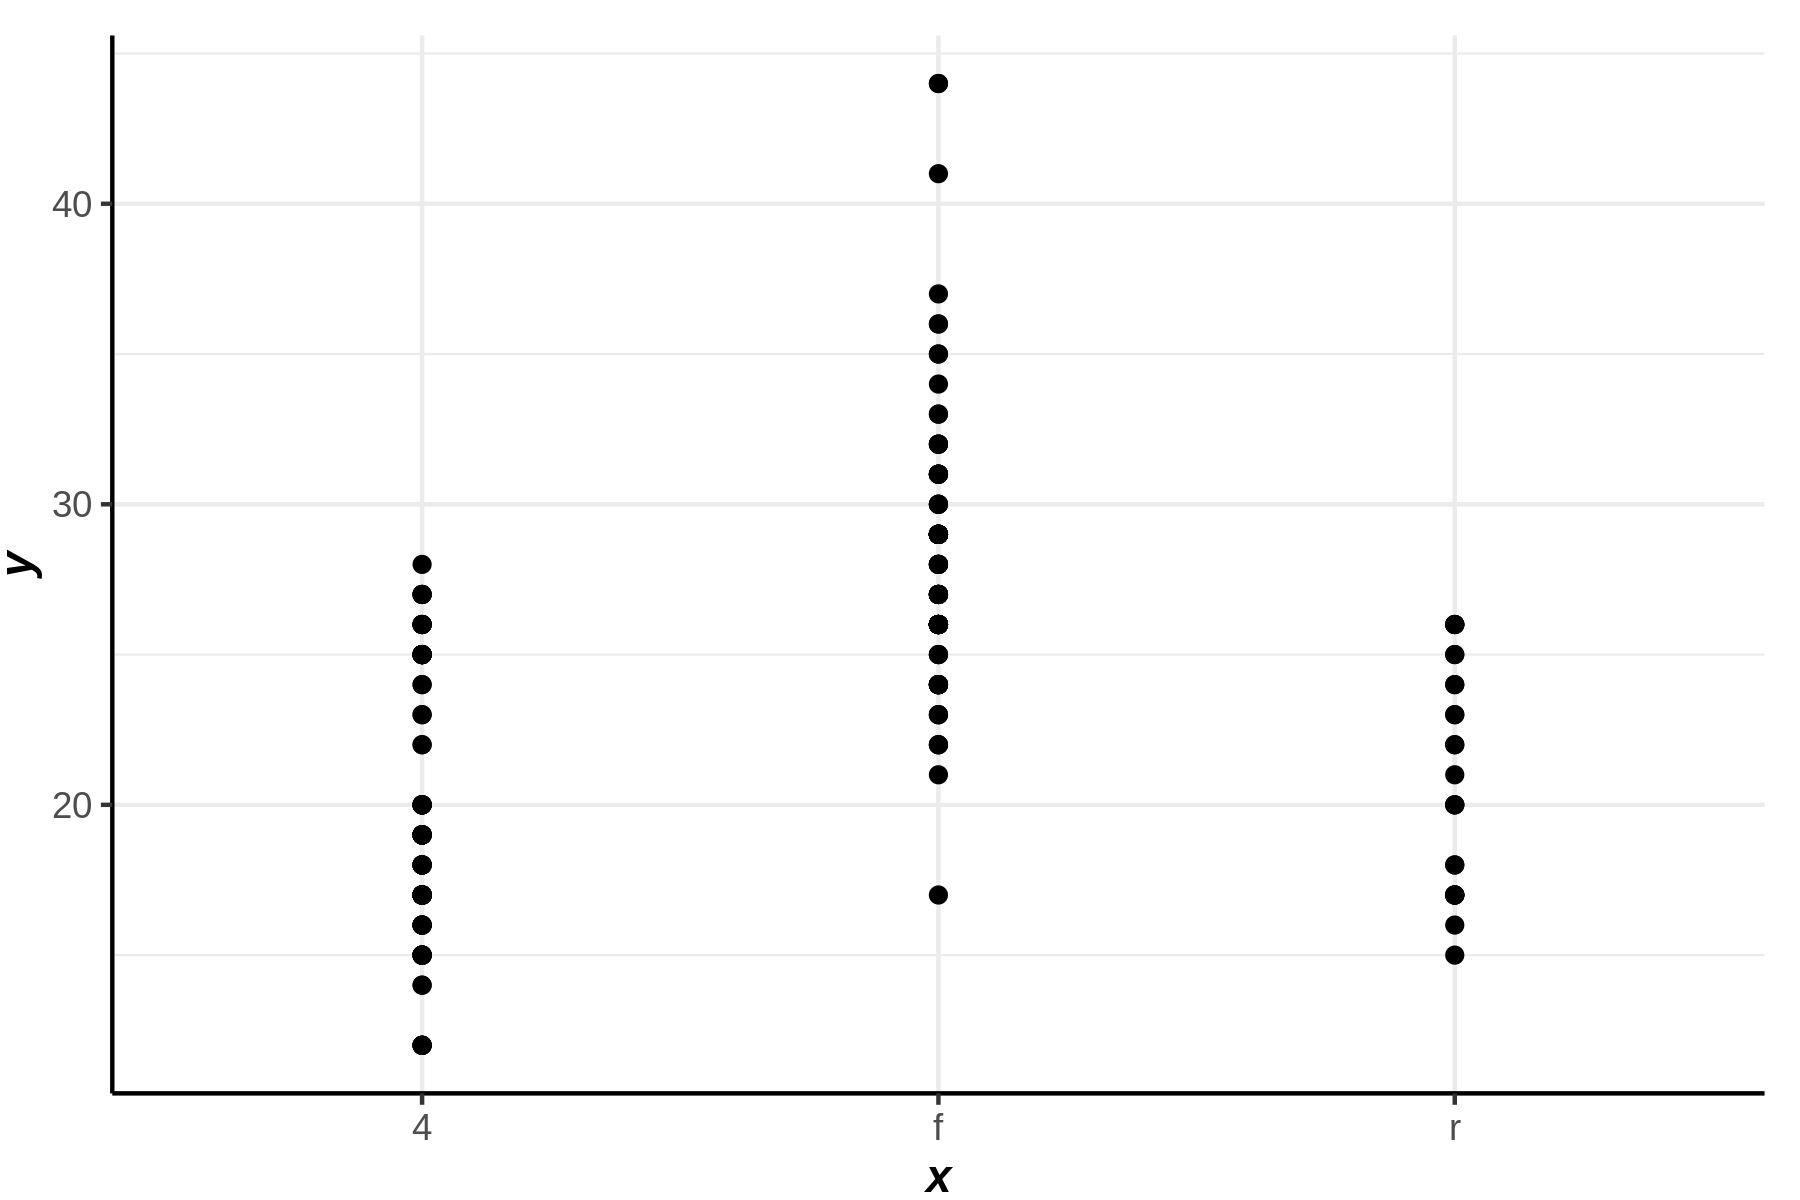

In [15]:
ggplot() + point(mpg$drv, mpg$hwy)

`ggplot2`
```R
ggplot(mpg, aes(drv, hwy)) + geom_jitter()
ggplot(mpg, aes(drv, hwy)) + geom_boxplot()
ggplot(mpg, aes(drv, hwy)) + geom_violin()
```

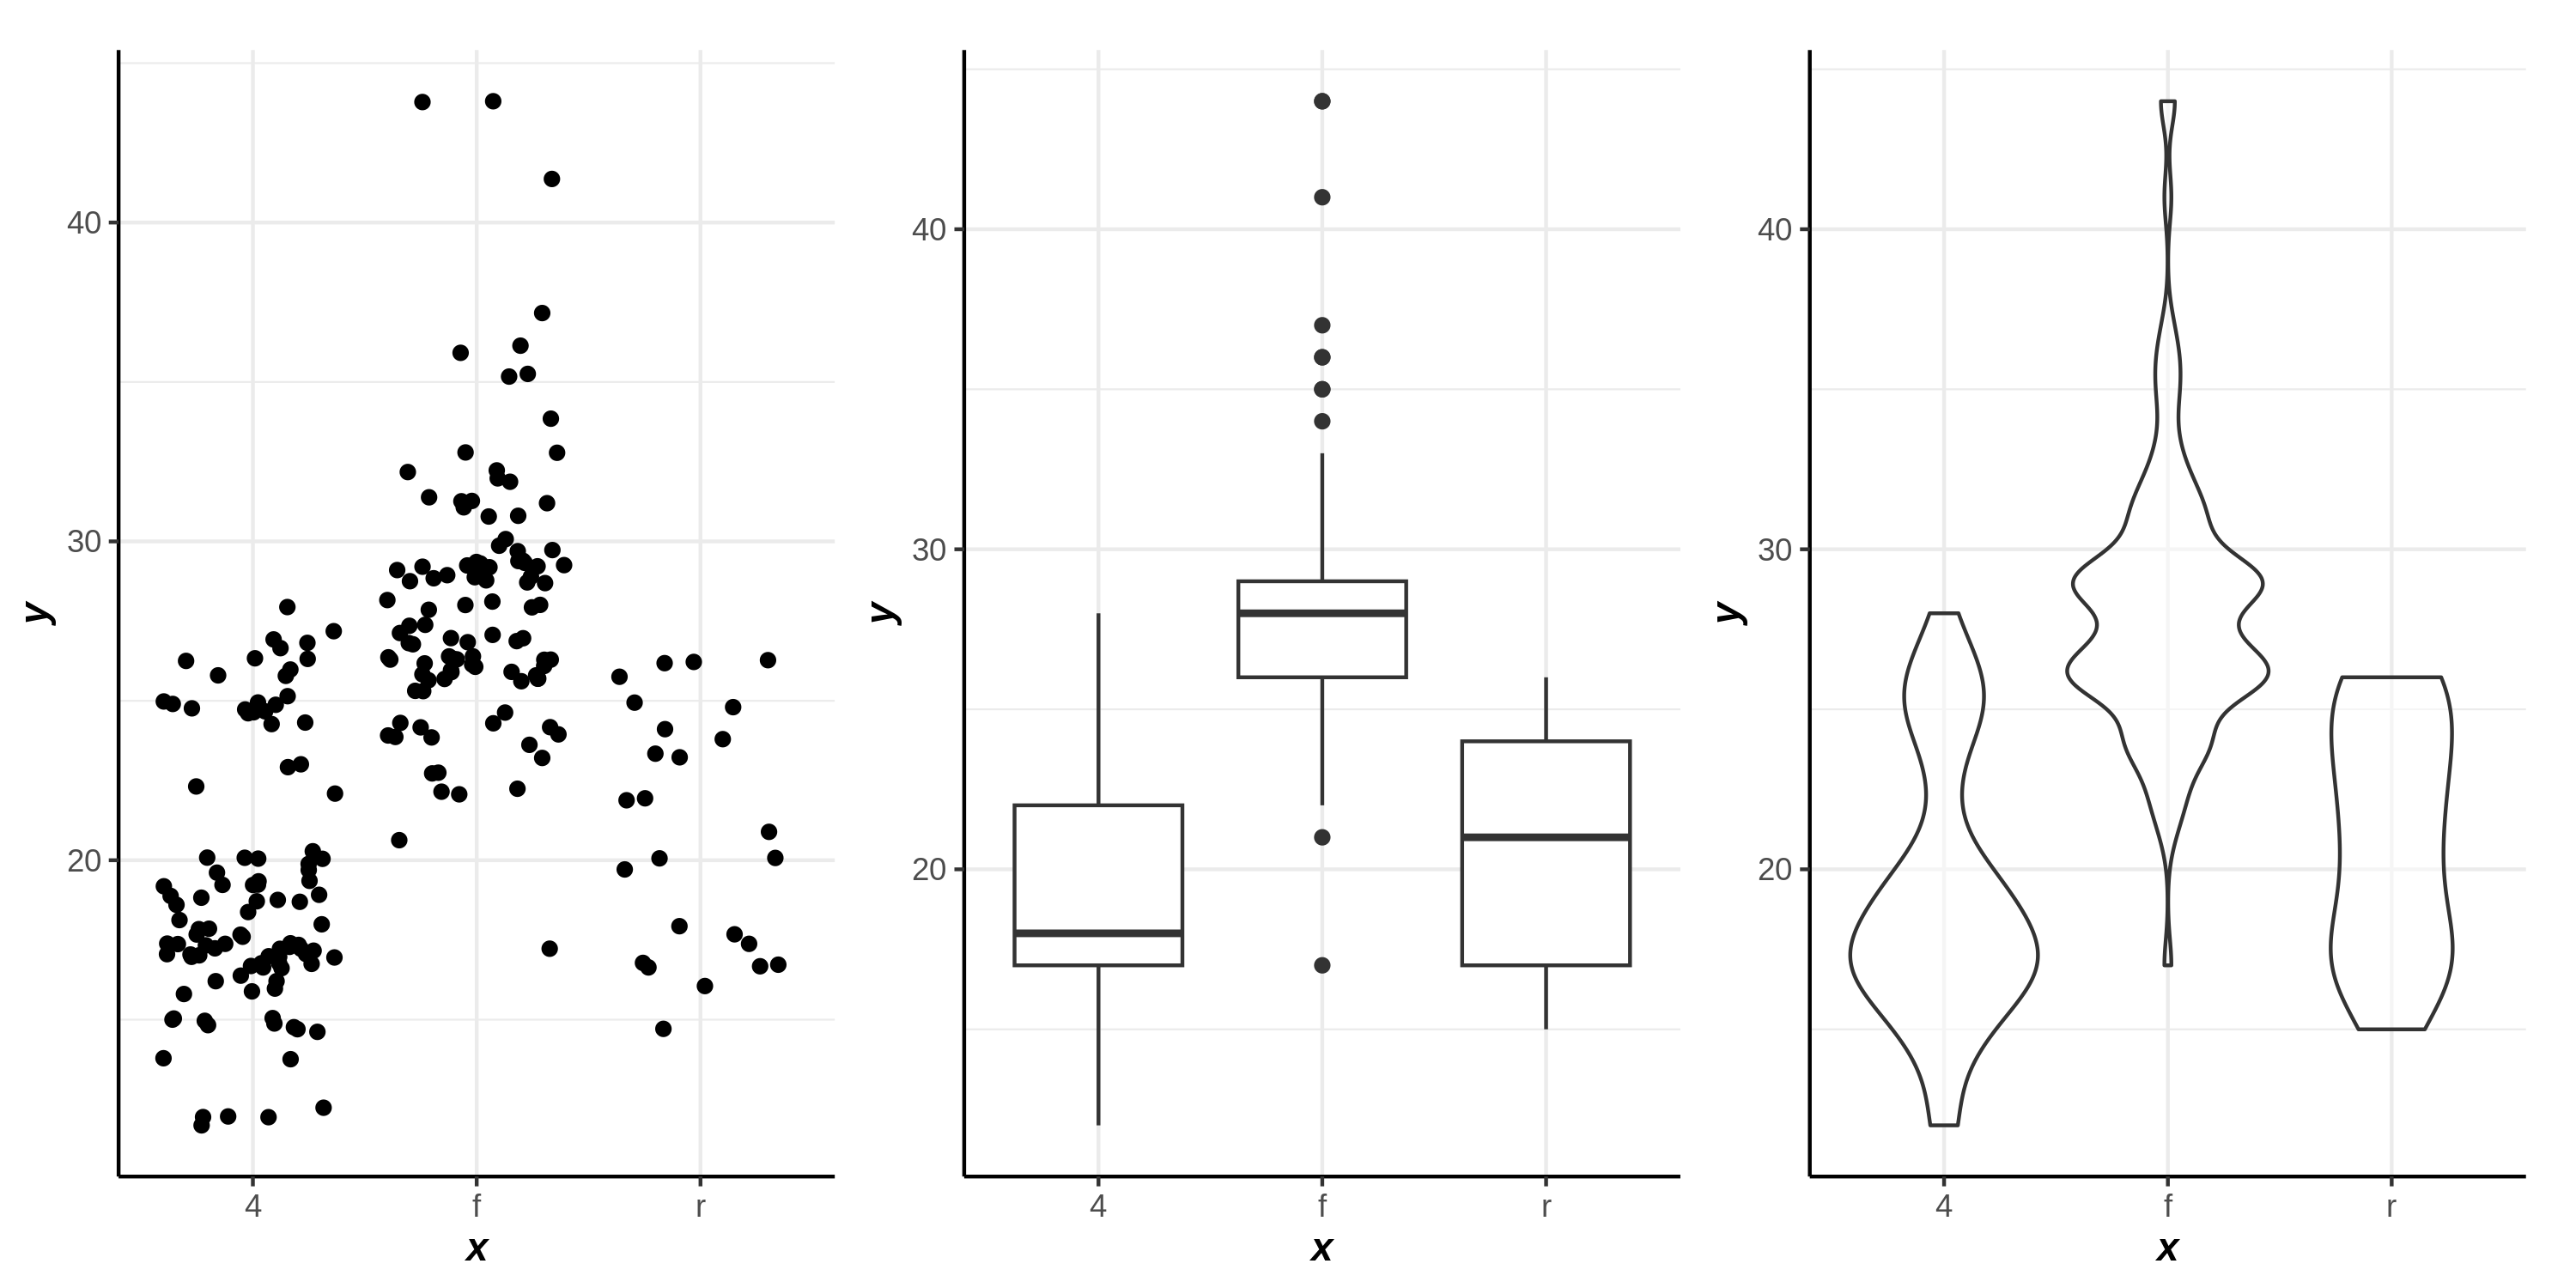

In [16]:
p1 = ggplot() + jitter(mpg$drv, mpg$hwy) 
p2 = ggplot() + boxplot(mpg$drv, mpg$hwy)
p3 = ggplot() + violin(mpg$drv, mpg$hwy)
figsize(10,5)
p1|p2|p3
figsize()

## 2.6.3 Histograms and frequency polygons

`ggplot2`
```R
ggplot(mpg, aes(hwy)) + geom_histogram()
#> `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
ggplot(mpg, aes(hwy)) + geom_freqpoly()
#> `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
```

### ***geom_freqpoly**대체할만한게 뭐 있을까..***

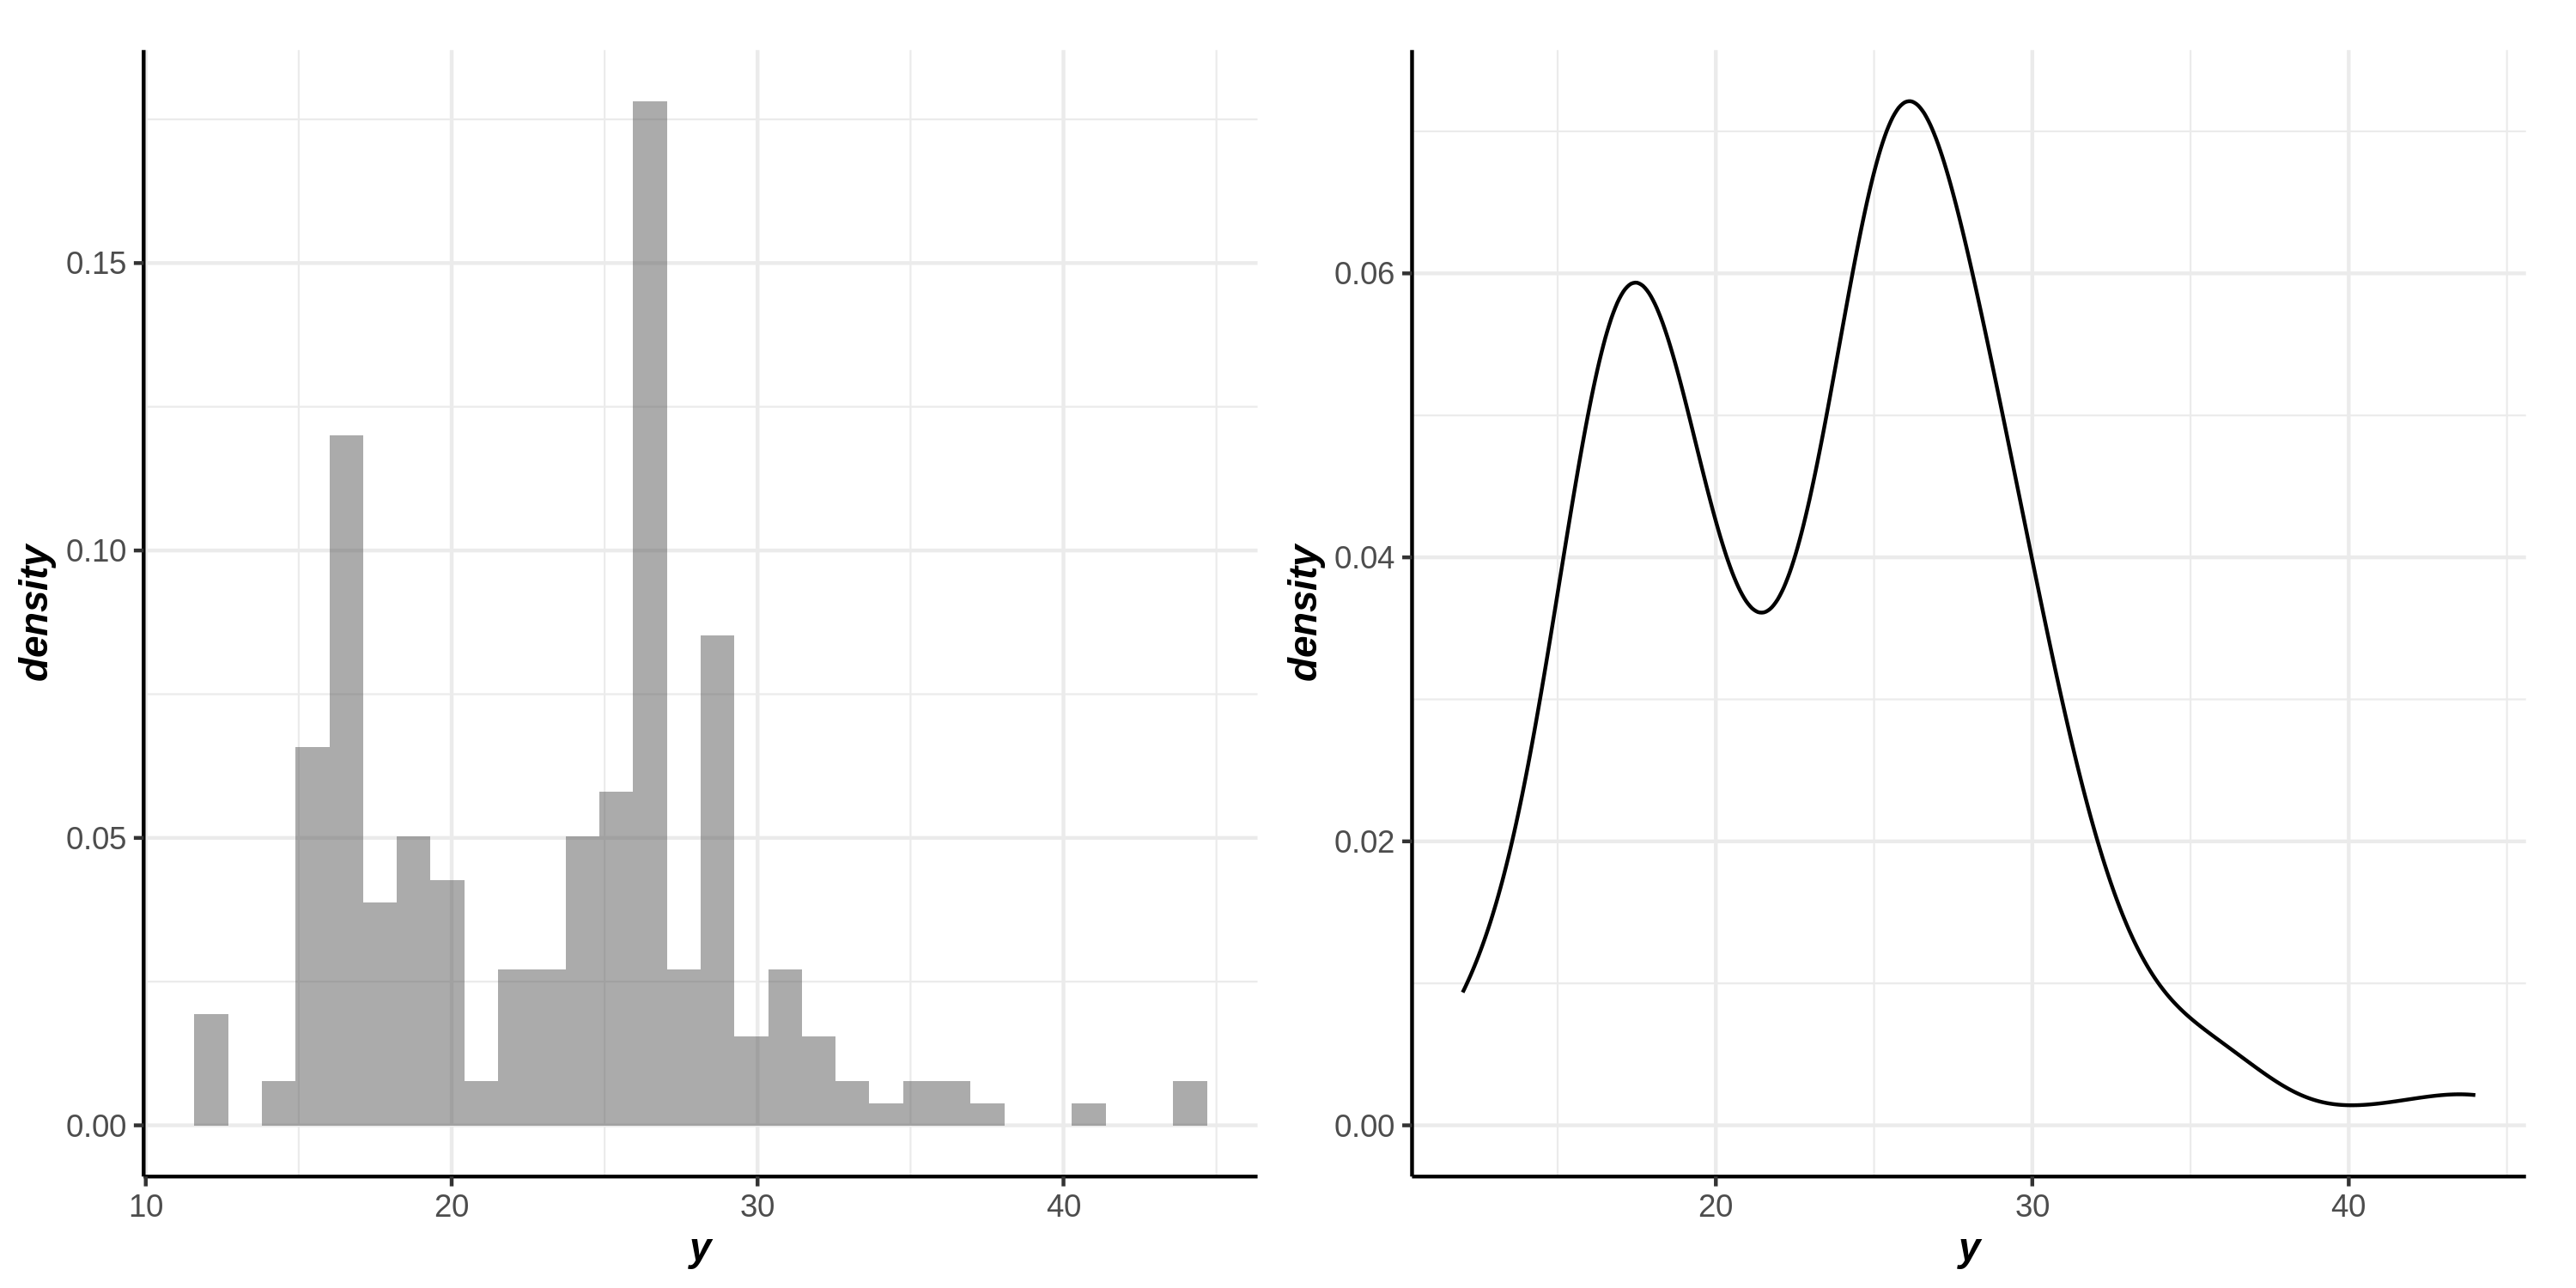

In [59]:
p1 = ggplot() + histogram(mpg$hwy)
p2 = ggplot() + density(mpg$hwy)
figsize(10,5)
p1|p2
figsize()

`ggplot2`
```R
ggplot(mpg, aes(displ, colour = drv)) + 
  geom_freqpoly(binwidth = 0.5)
ggplot(mpg, aes(displ, fill = drv)) + 
  geom_histogram(binwidth = 0.5) + 
  facet_wrap(~drv, ncol = 1)
  ```

In [26]:
y1 = rnorm(1000)
y2 = rnorm(1000)*0.5 + 3 

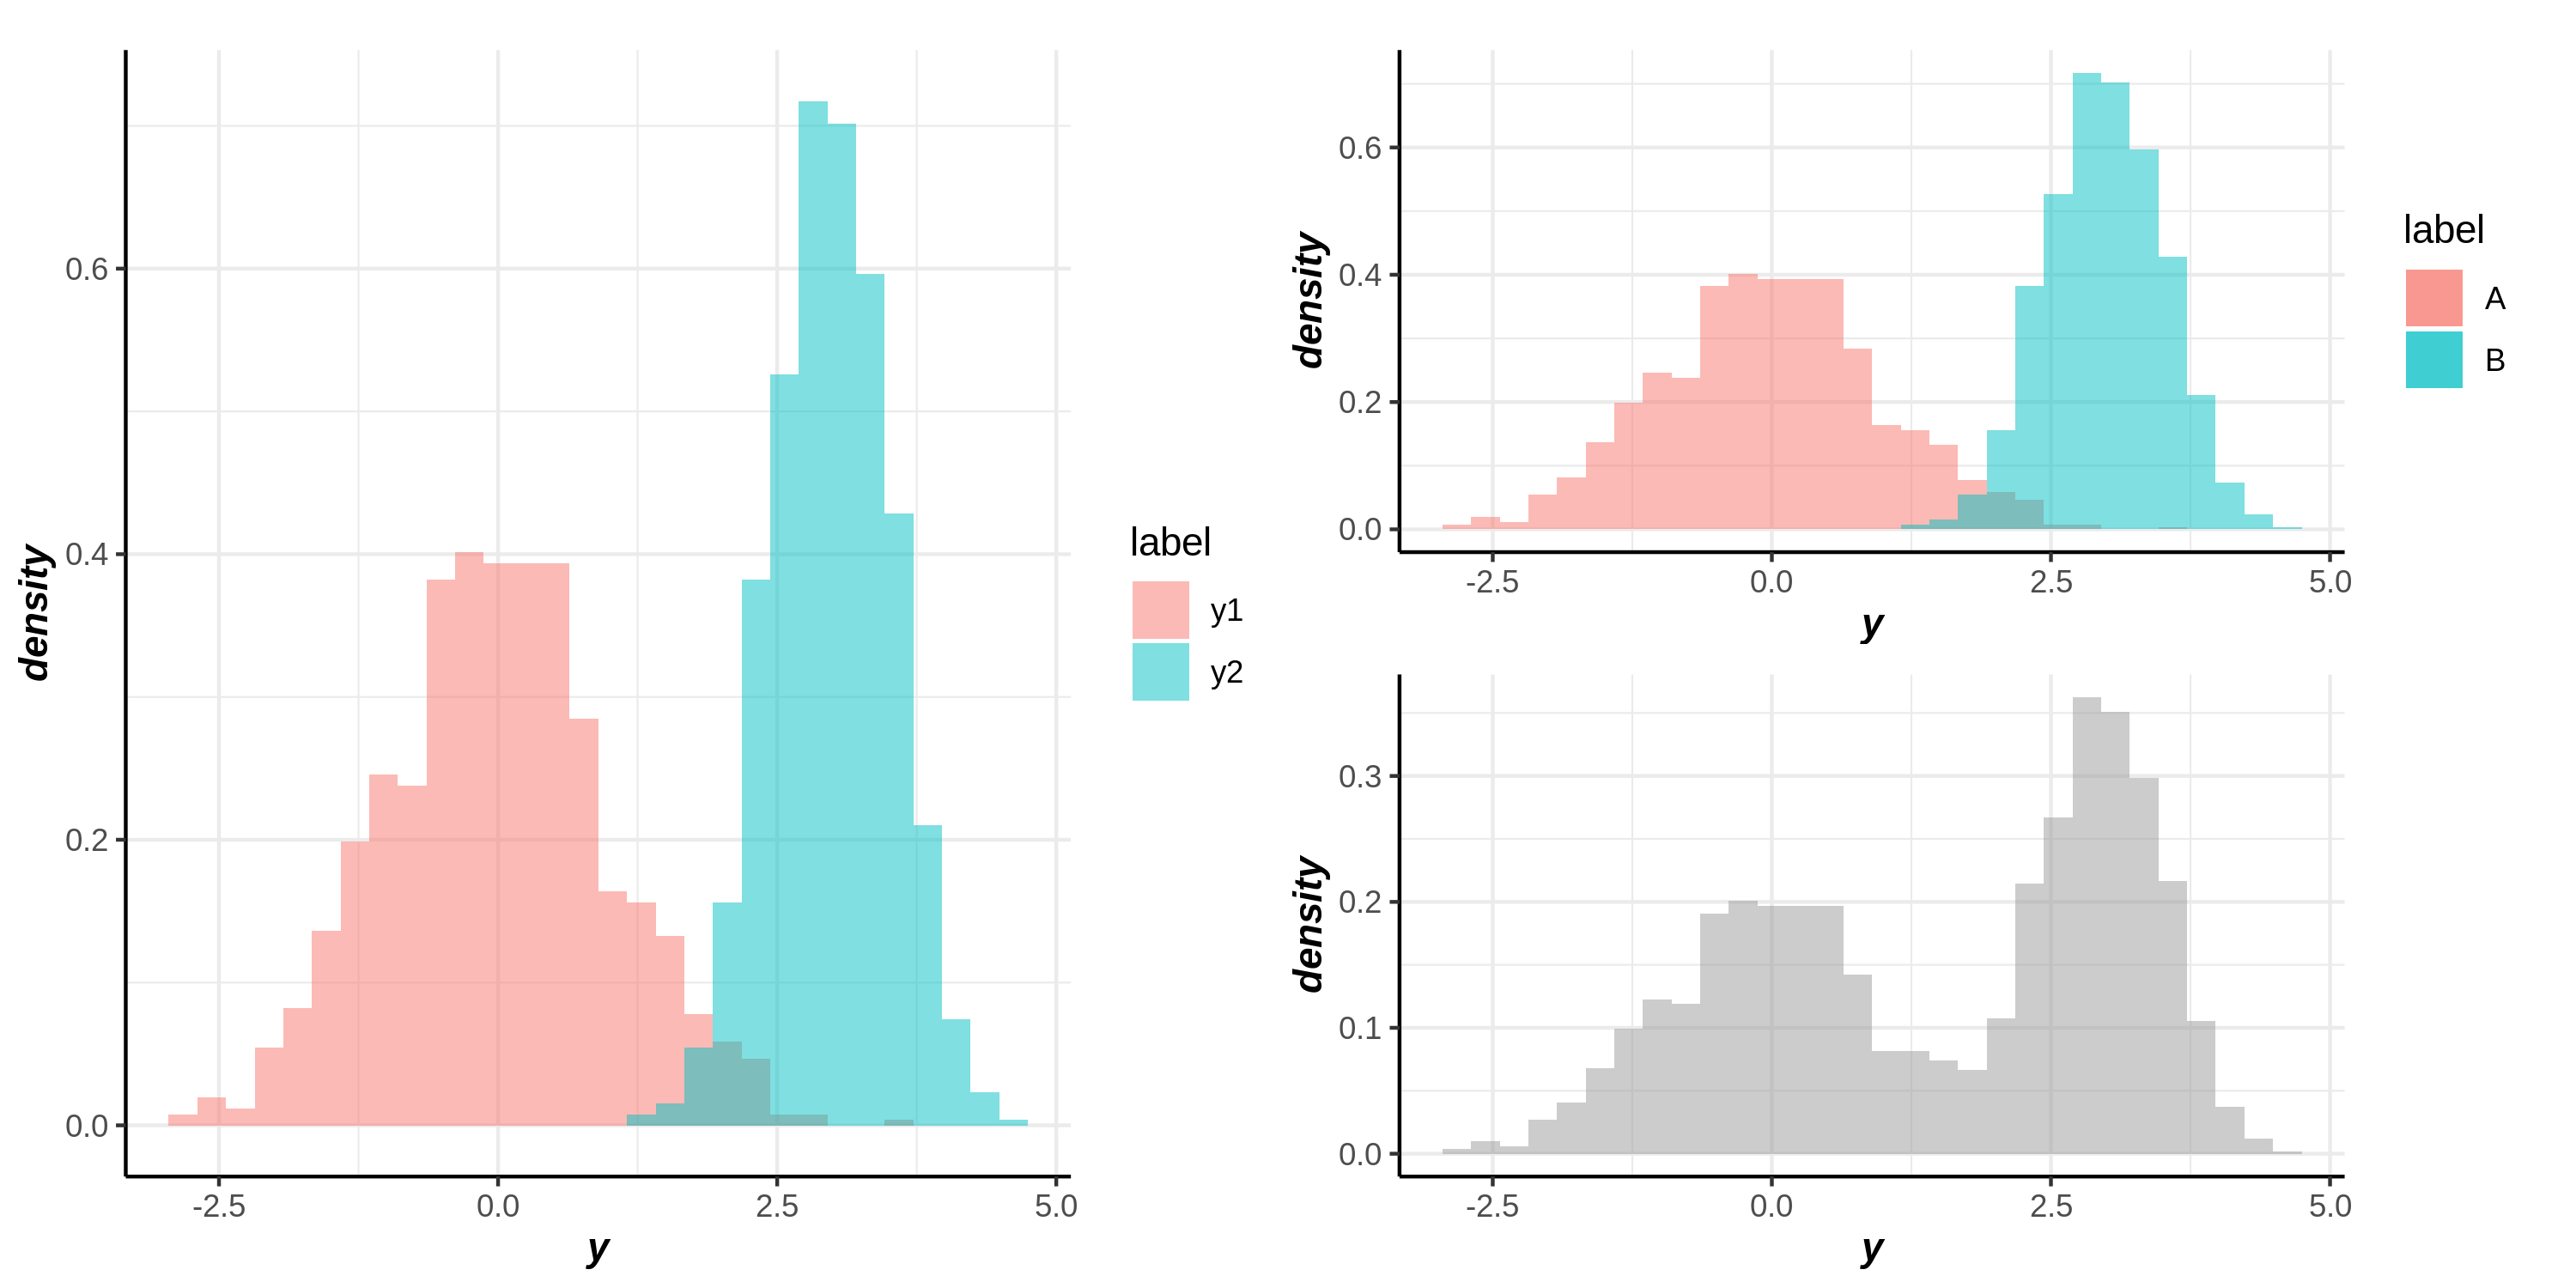

In [27]:
p1 = ggplot()+histogram(cbind(y1,y2))
p2 = ggplot()+histogram(y1,label="A")+histogram(y2,label="B")
p3 = ggplot()+histogram(c(y1,y2),fill="gray60")
figsize(10,5)
p1|(p2/p3)
figsize()

## 2.6.4 Bar charts

`ggplot2`
```R
ggplot(mpg, aes(manufacturer)) + 
  geom_bar()
```

### ***x,y축 어떻게 바꿀 수 있을까...***

In [ ]:
mpg$manufacturer

In [ ]:
ggplot() + col(mpg$manufacturer,fill=3)

In [67]:
drugs <- data.frame(
  drug = c("a", "b", "c"),
  effect = c(4.2, 9.7, 6.1)
)

`ggplot2`
```R
ggplot(drugs, aes(drug, effect)) + geom_bar(stat = "identity")
ggplot(drugs, aes(drug, effect)) + geom_point()
```

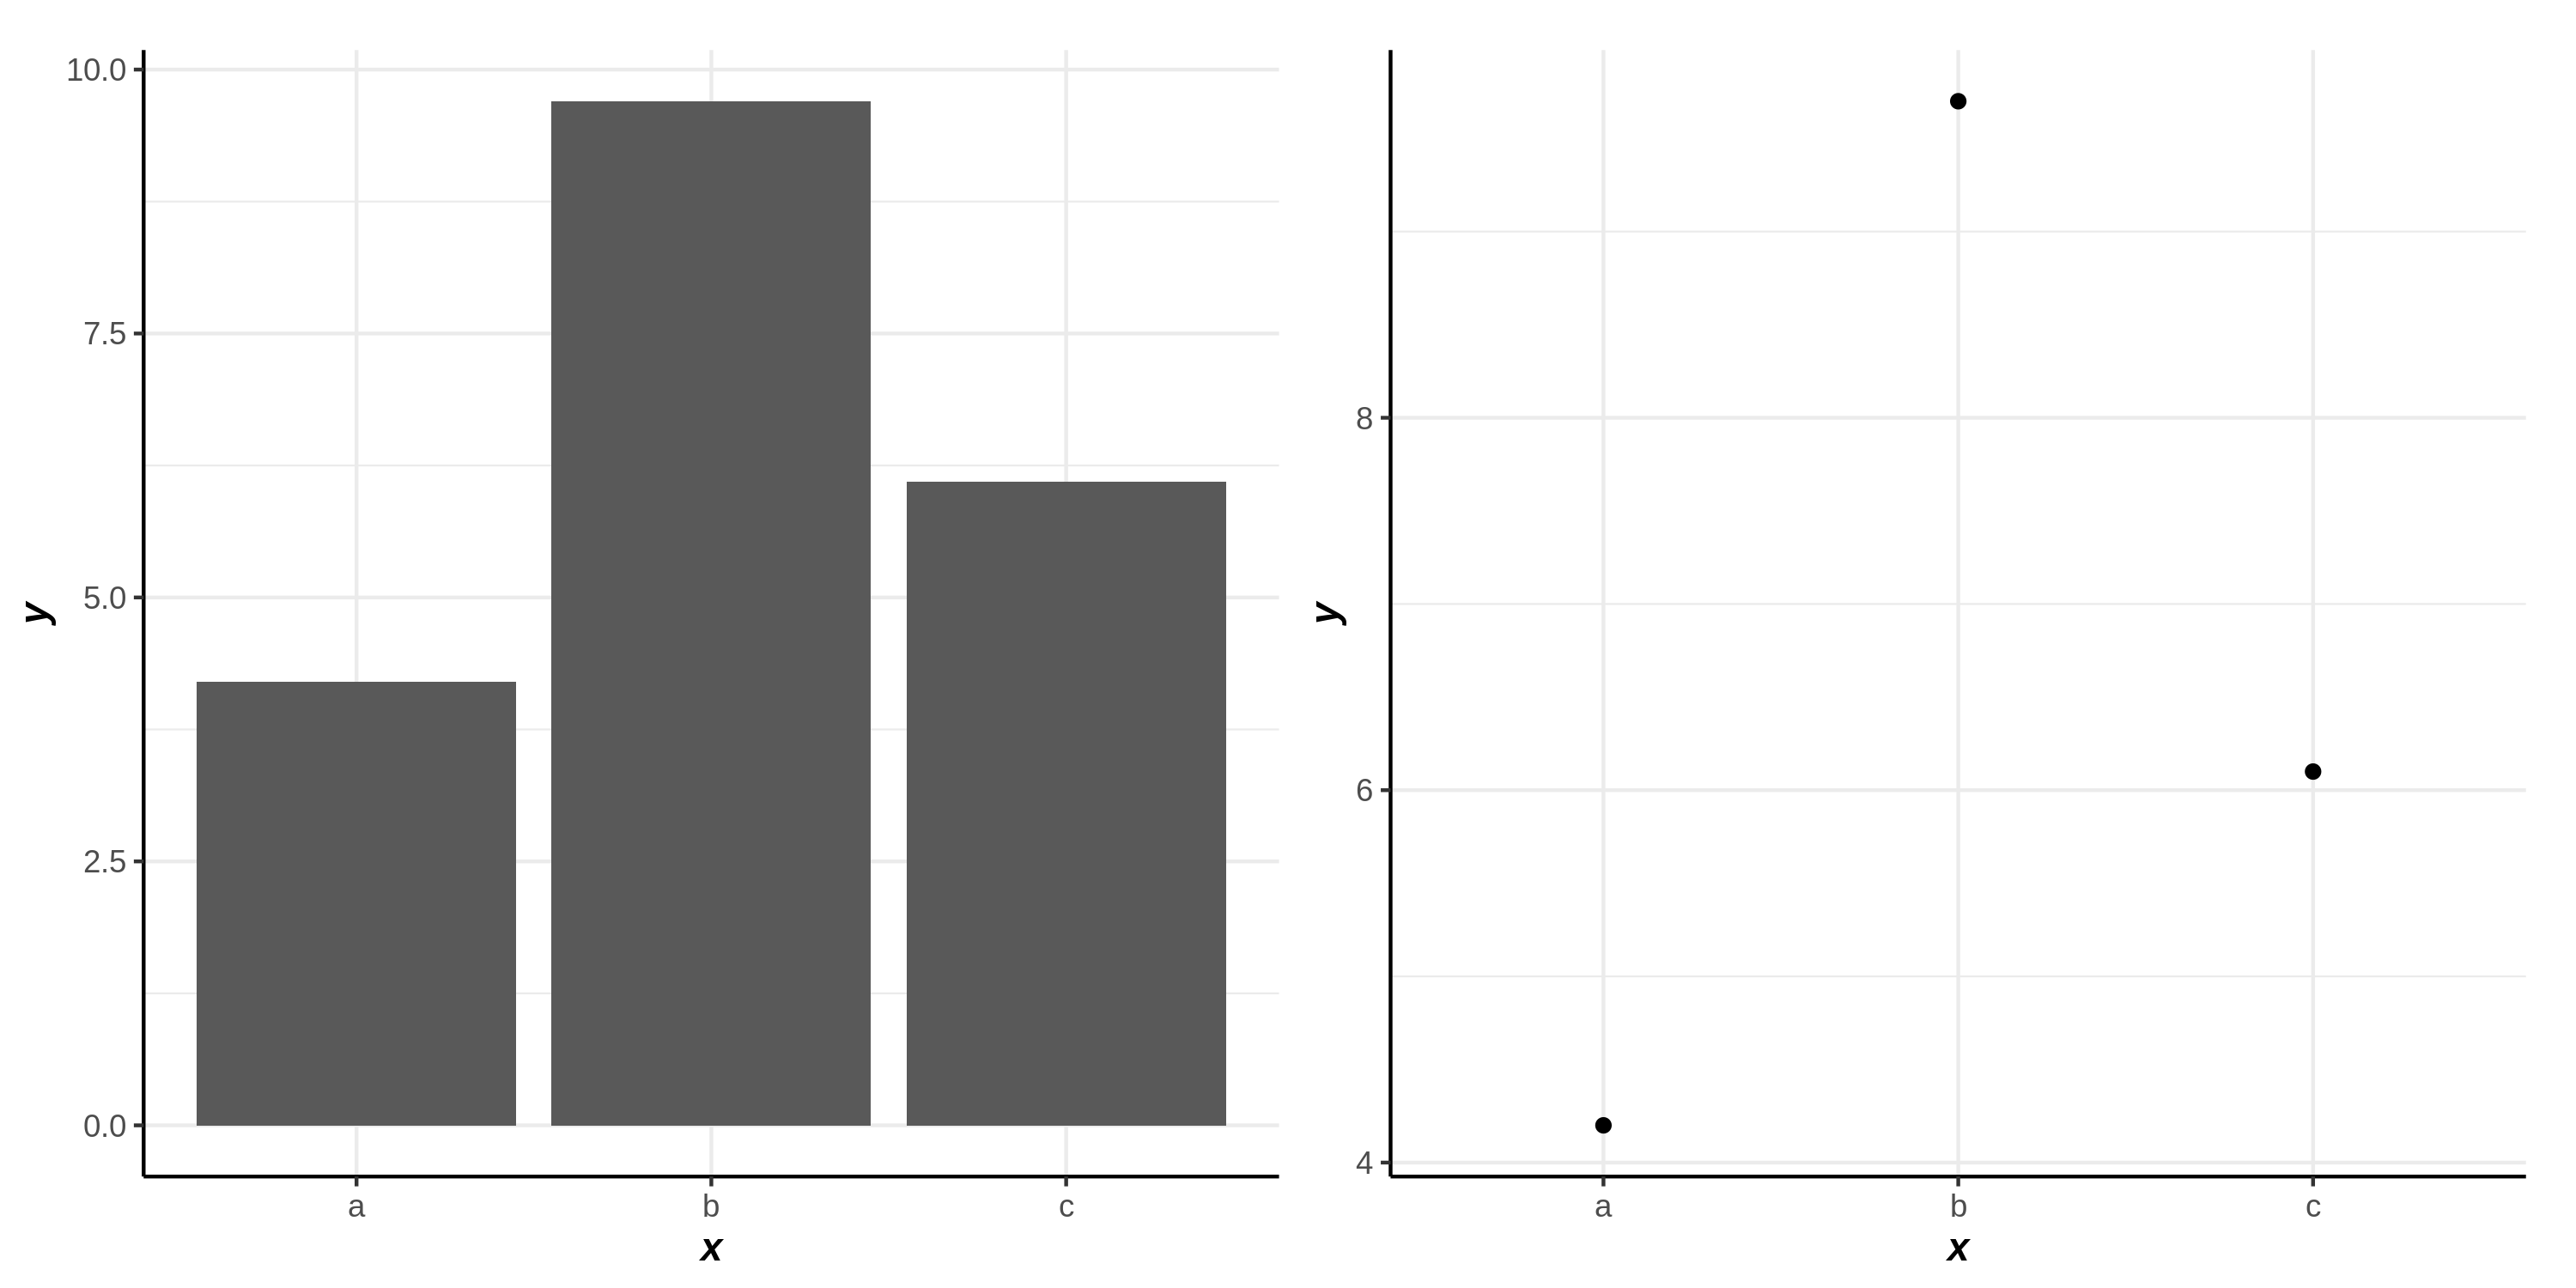

In [75]:
p1 = ggplot() + col(drugs$drug, drugs$effect)
p2 = ggplot() + point(drugs$drug, drugs$effect)
figsize(10,5)
p1|p2
figsize()

`ggplot2`
```R
ggplot(economics, aes(date, unemploy / pop)) +
  geom_line()
ggplot(economics, aes(date, uempmed)) +
  geom_line()
```

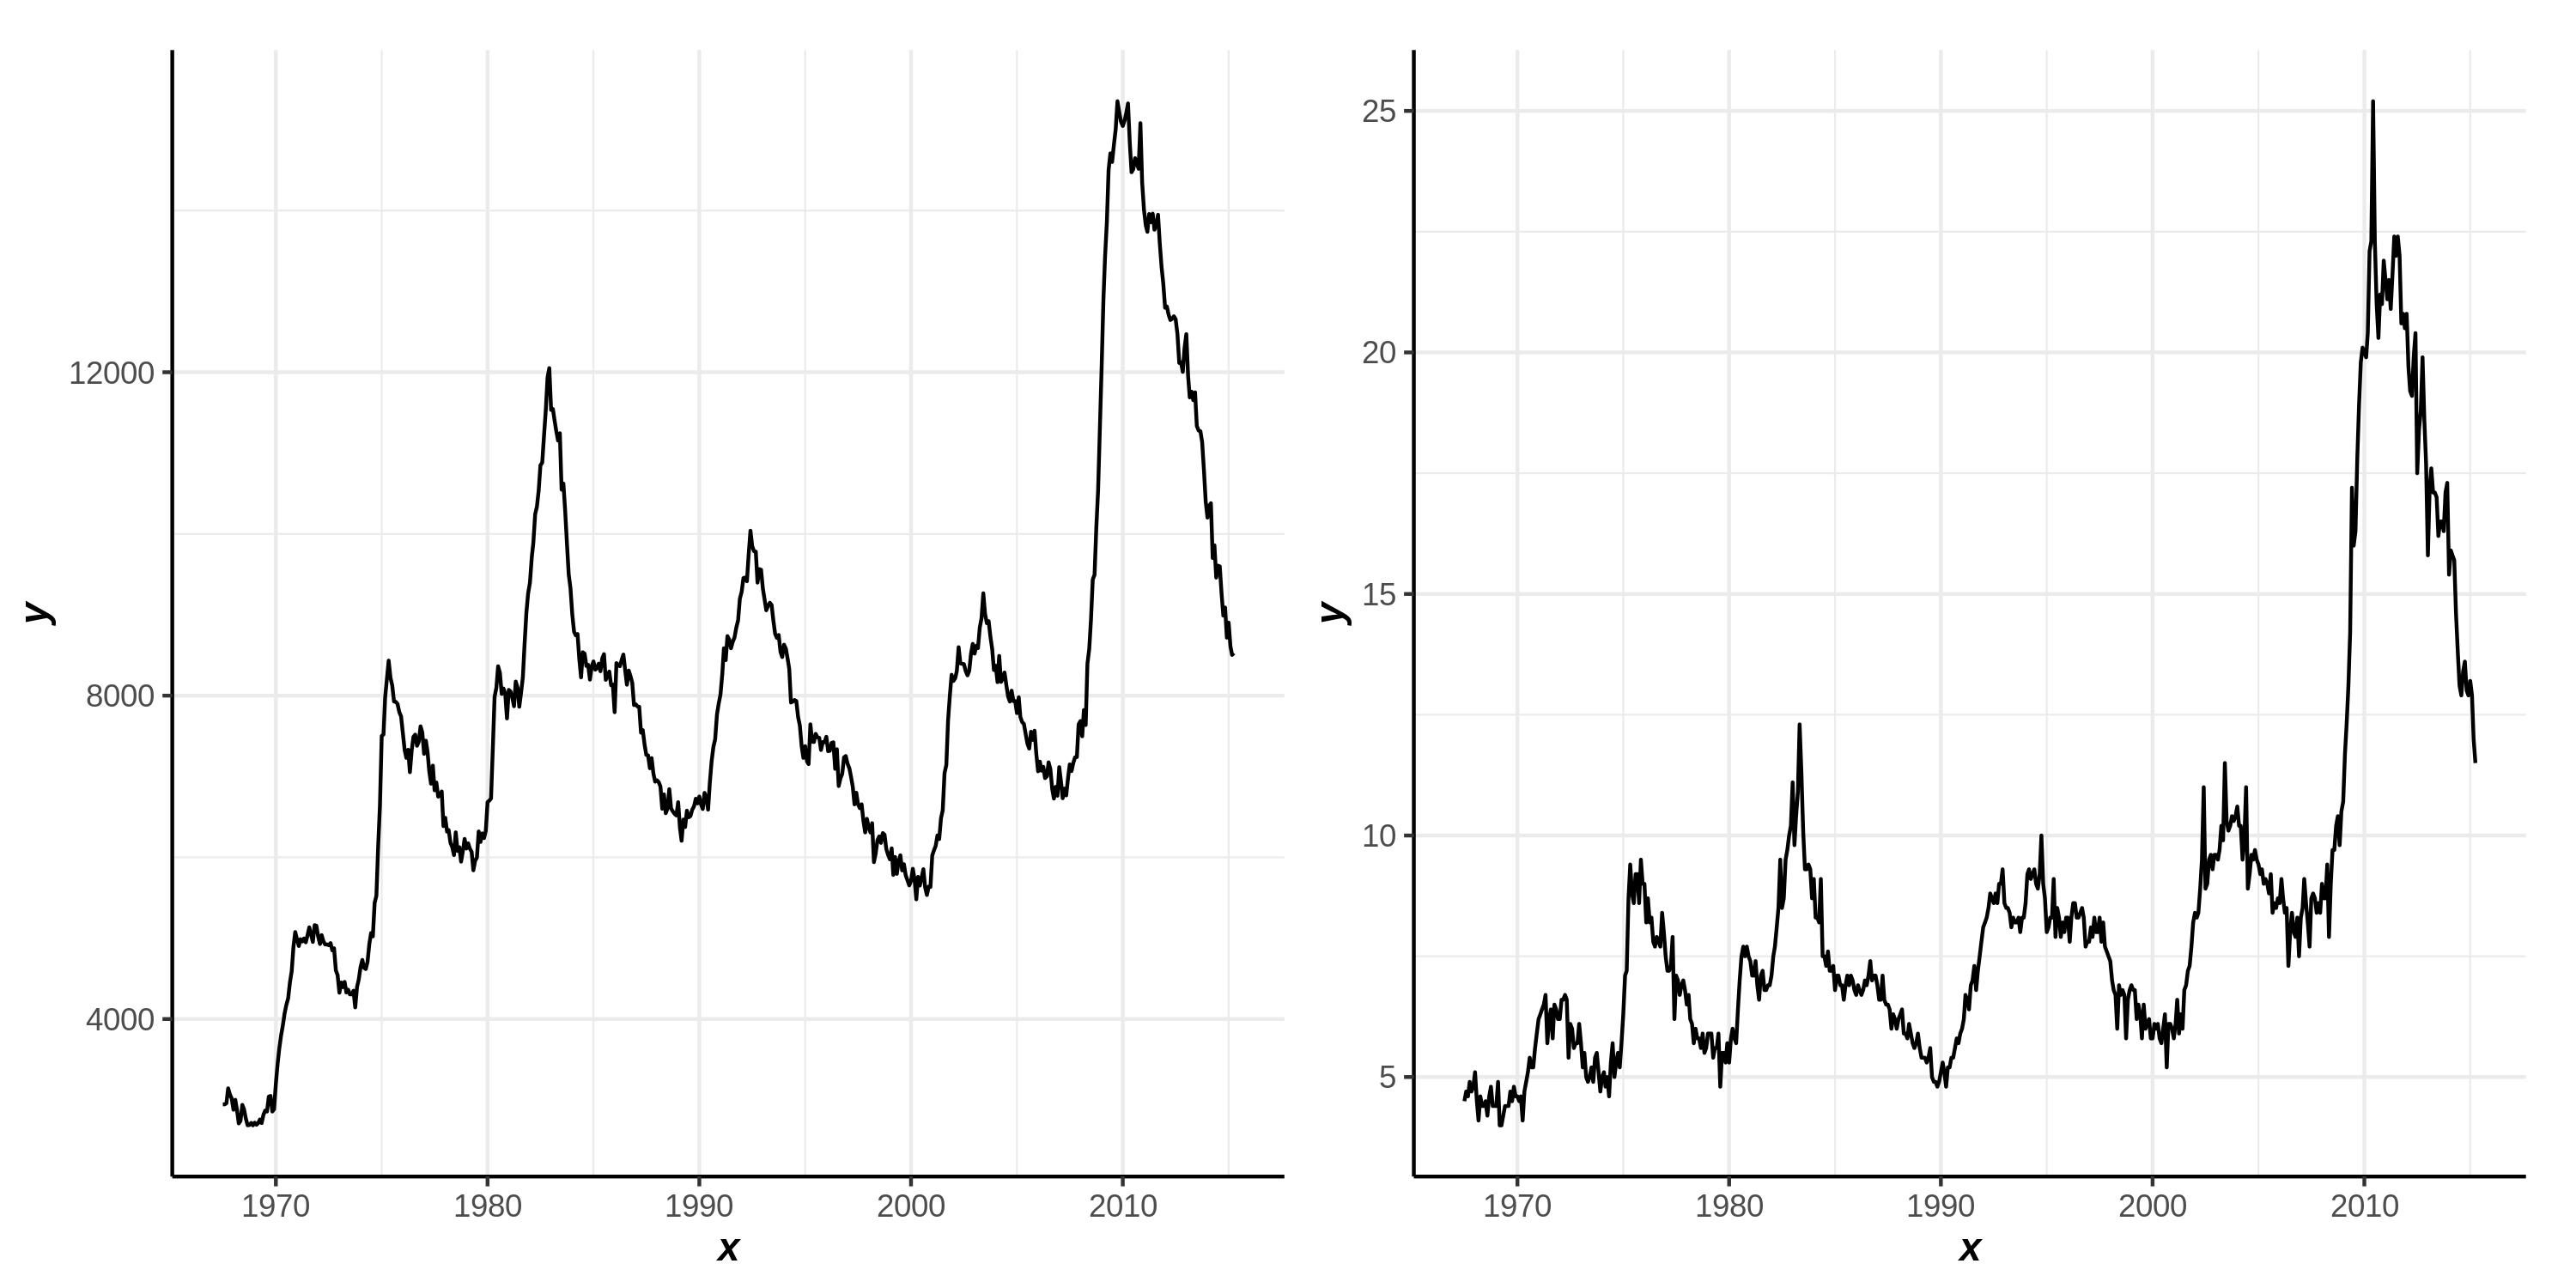

In [76]:
p1 = ggplot() + line(economics$date, economics$unemploy)
p2 = ggplot() + line(economics$date, economics$uempmed)
figsize(10,5)
p1|p2
figsize()

# Output

## Same with ggplot2

In [81]:
# Save png to disk
# ggsave("plot.png", p, width = 5, height = 5)